# Unsupervised Learning: Guida Completa

**Durata**: 5 ore  
**Prerequisiti**: Python base, concetti fondamentali di Machine Learning

---

## Indice

1. [Introduzione all'Unsupervised Learning](#1.-Introduzione-all'Unsupervised-Learning)
2. [Clustering](#2.-Clustering)
   - 2.1 K-Means
   - 2.2 DBSCAN
   - 2.3 Clustering Gerarchico
   - 2.4 Gaussian Mixture Models
3. [Riduzione della Dimensionalita](#3.-Riduzione-della-Dimensionalita)
   - 3.1 PCA
   - 3.2 t-SNE
   - 3.3 UMAP
4. [Anomaly Detection](#4.-Anomaly-Detection)
   - 4.1 Isolation Forest
   - 4.2 Local Outlier Factor
5. [Association Rules](#5.-Association-Rules)
   - 5.1 Apriori e FP-Growth
6. [Progetto Finale](#6.-Progetto-Finale)
7. [Conclusioni e Risorse](#7.-Conclusioni-e-Risorse)

---

## 1. Introduzione all'Unsupervised Learning

L'**Unsupervised Learning** (apprendimento non supervisionato) rappresenta una delle branche fondamentali del Machine Learning. A differenza del Supervised Learning, dove disponiamo di etichette che indicano la risposta corretta per ogni esempio, nell'Unsupervised Learning lavoriamo con dati **privi di etichette**.

### 1.1 Differenza con il Supervised Learning

| Caratteristica | Supervised Learning | Unsupervised Learning |
|----------------|--------------------|-----------------------|
| **Etichette** | Presenti | Assenti |
| **Obiettivo** | Predire una variabile target | Scoprire pattern nascosti |
| **Validazione** | Confronto con ground truth | Metriche interne (silhouette, inertia) |
| **Esempi** | Classificazione, Regressione | Clustering, Dimensionality Reduction |

### 1.2 Quando usare l'Unsupervised Learning

L'apprendimento non supervisionato e particolarmente utile quando:

- **Non disponiamo di etichette**: raccogliere etichette puo essere costoso o impossibile
- **Vogliamo esplorare i dati**: scoprire strutture nascoste prima di costruire modelli supervisionati
- **Dobbiamo ridurre la dimensionalita**: preparare i dati per algoritmi successivi
- **Cerchiamo anomalie**: identificare comportamenti insoliti senza esempi di anomalie

### 1.3 Le quattro categorie principali

In questo corso esploreremo:

1. **Clustering**: raggruppare dati simili (K-Means, DBSCAN, Hierarchical, GMM)
2. **Dimensionality Reduction**: ridurre le feature preservando l'informazione (PCA, t-SNE, UMAP)
3. **Anomaly Detection**: identificare outlier (Isolation Forest, LOF)
4. **Association Rules**: scoprire relazioni tra variabili (Apriori, FP-Growth)

### 1.4 Setup dell'ambiente

Installiamo tutte le librerie necessarie per il corso.

In [1]:
# Installazione delle librerie necessarie
!pip install -q numpy pandas matplotlib seaborn scikit-learn umap-learn mlxtend

In [2]:
# Verifica delle versioni installate
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

print(f"NumPy: {np.__version__}")
print(f"Pandas: {pd.__version__}")
print(f"Scikit-learn: {sklearn.__version__}")

# Configurazione visualizzazioni
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

# Seed per riproducibilita
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

NumPy: 2.0.2
Pandas: 2.2.2
Scikit-learn: 1.6.1


---

## 2. Clustering

Il **clustering** e la tecnica di raggruppare oggetti simili in insiemi chiamati **cluster**. Gli oggetti all'interno dello stesso cluster sono piu simili tra loro rispetto a quelli in cluster diversi.

### Metriche di valutazione del clustering

Poiche non abbiamo etichette, valutiamo la qualita del clustering con metriche **interne**:

- **Silhouette Score**: misura quanto un punto e simile al proprio cluster rispetto agli altri. Valore tra -1 e 1, piu alto e meglio.

$$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$$

dove $a(i)$ e la distanza media intra-cluster e $b(i)$ e la distanza media al cluster piu vicino.

- **Inertia** (solo K-Means): somma delle distanze quadrate dai punti ai centroidi. Piu basso e meglio.

- **Calinski-Harabasz Index**: rapporto tra dispersione inter-cluster e intra-cluster. Piu alto e meglio.

- **Davies-Bouldin Index**: media della similarita massima tra cluster. Piu basso e meglio.

### 2.1 K-Means Clustering

**K-Means** e l'algoritmo di clustering piu popolare. Partiziona i dati in $K$ cluster, dove ogni punto appartiene al cluster con il centroide piu vicino.

#### Come funziona K-Means

1. **Inizializzazione**: seleziona $K$ centroidi iniziali (casualmente o con k-means++)
2. **Assegnazione**: ogni punto viene assegnato al centroide piu vicino
3. **Aggiornamento**: i centroidi vengono ricalcolati come media dei punti assegnati
4. **Iterazione**: ripeti passi 2-3 fino a convergenza

#### Vantaggi e svantaggi

| Vantaggi | Svantaggi |
|----------|----------|
| Semplice e veloce | Richiede di specificare $K$ |
| Scalabile a grandi dataset | Assume cluster sferici |
| Funziona bene con cluster compatti | Sensibile agli outlier |
| Risultati interpretabili | Sensibile all'inizializzazione |

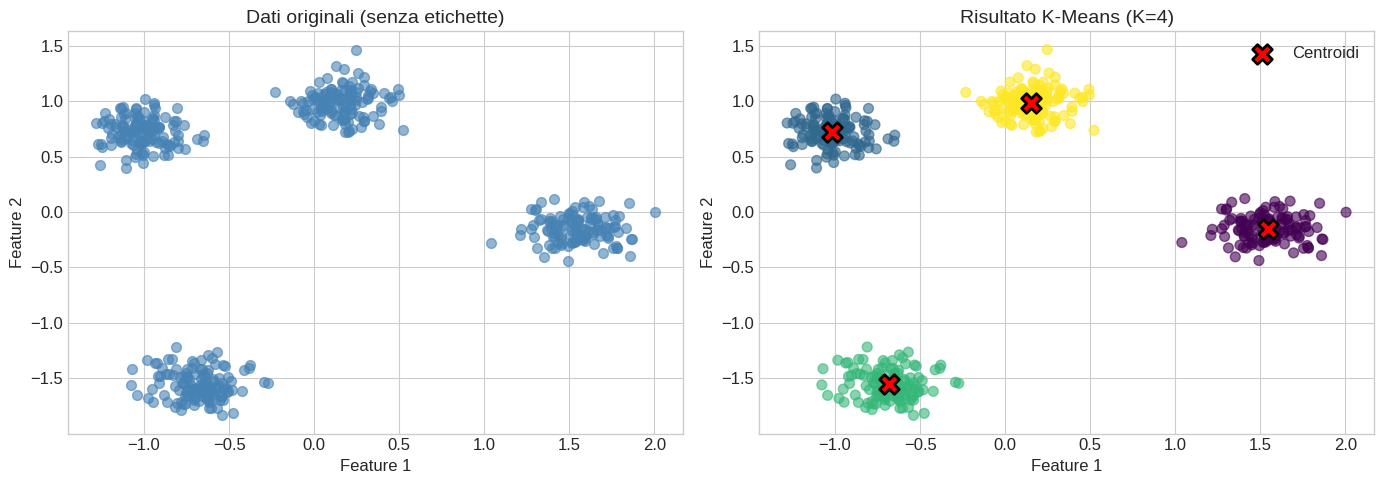

METRICHE DI VALUTAZIONE K-MEANS
Inertia: 18.66
Silhouette Score: 0.839
Calinski-Harabasz Index: 8696.81
Davies-Bouldin Index: 0.225


In [3]:
# SEZIONE 2.1: K-Means Clustering
# Questa sezione e completamente incapsulata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.preprocessing import StandardScaler

# Generazione dataset sintetico con 4 cluster ben separati
X_kmeans, y_true_kmeans = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=0.8,
    random_state=42
)

# Standardizzazione (best practice per K-Means)
scaler_kmeans = StandardScaler()
X_kmeans_scaled = scaler_kmeans.fit_transform(X_kmeans)

# Visualizzazione dati originali
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].scatter(X_kmeans_scaled[:, 0], X_kmeans_scaled[:, 1], c='steelblue', alpha=0.6, s=50)
axes[0].set_title('Dati originali (senza etichette)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Applicazione K-Means
kmeans_model = KMeans(
    n_clusters=4,
    init='k-means++',  # Inizializzazione intelligente
    n_init=10,         # Numero di inizializzazioni
    max_iter=300,
    random_state=42
)
labels_kmeans = kmeans_model.fit_predict(X_kmeans_scaled)

# Visualizzazione risultati
scatter = axes[1].scatter(
    X_kmeans_scaled[:, 0],
    X_kmeans_scaled[:, 1],
    c=labels_kmeans,
    cmap='viridis',
    alpha=0.6,
    s=50
)
axes[1].scatter(
    kmeans_model.cluster_centers_[:, 0],
    kmeans_model.cluster_centers_[:, 1],
    c='red',
    marker='X',
    s=200,
    edgecolors='black',
    linewidths=2,
    label='Centroidi'
)
axes[1].set_title('Risultato K-Means (K=4)', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')
axes[1].legend()

plt.tight_layout()
plt.show()

# Metriche di valutazione
print("=" * 50)
print("METRICHE DI VALUTAZIONE K-MEANS")
print("=" * 50)
print(f"Inertia: {kmeans_model.inertia_:.2f}")
print(f"Silhouette Score: {silhouette_score(X_kmeans_scaled, labels_kmeans):.3f}")
print(f"Calinski-Harabasz Index: {calinski_harabasz_score(X_kmeans_scaled, labels_kmeans):.2f}")
print(f"Davies-Bouldin Index: {davies_bouldin_score(X_kmeans_scaled, labels_kmeans):.3f}")

#### Il metodo del gomito (Elbow Method)

Come scegliere il numero ottimale di cluster $K$? Il **metodo del gomito** visualizza l'inertia al variare di $K$: il punto ottimale e dove la curva "piega" come un gomito.

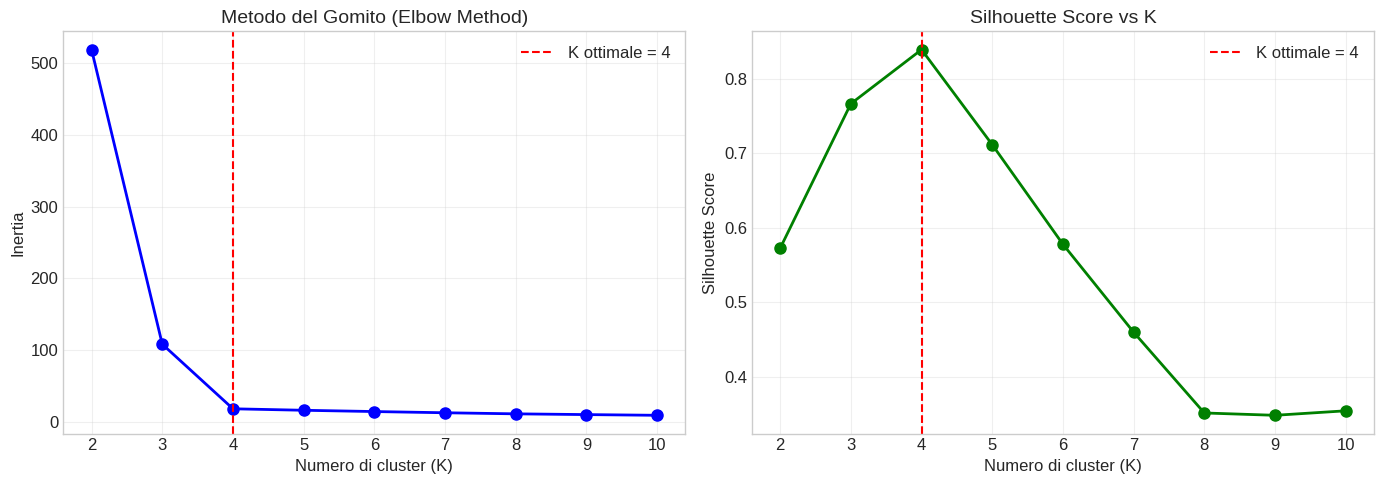

Osservazione: il gomito si trova a K=4, confermato anche dal picco del Silhouette Score.


In [4]:
# Elbow Method per determinare K ottimale
# Sezione incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Generazione dati
X_elbow, _ = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=0.8, random_state=42)
scaler_elbow = StandardScaler()
X_elbow_scaled = scaler_elbow.fit_transform(X_elbow)

# Calcolo metriche per diversi valori di K
k_range = range(2, 11)
inertias = []
silhouettes = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans.fit(X_elbow_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(silhouette_score(X_elbow_scaled, kmeans.labels_))

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Elbow plot
axes[0].plot(k_range, inertias, 'bo-', linewidth=2, markersize=8)
axes[0].axvline(x=4, color='red', linestyle='--', label='K ottimale = 4')
axes[0].set_xlabel('Numero di cluster (K)', fontsize=12)
axes[0].set_ylabel('Inertia', fontsize=12)
axes[0].set_title('Metodo del Gomito (Elbow Method)', fontsize=14)
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Silhouette plot
axes[1].plot(k_range, silhouettes, 'go-', linewidth=2, markersize=8)
axes[1].axvline(x=4, color='red', linestyle='--', label='K ottimale = 4')
axes[1].set_xlabel('Numero di cluster (K)', fontsize=12)
axes[1].set_ylabel('Silhouette Score', fontsize=12)
axes[1].set_title('Silhouette Score vs K', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Osservazione: il gomito si trova a K=4, confermato anche dal picco del Silhouette Score.")

**Osservazioni importanti su K-Means**

- Usare sempre `k-means++` per l'inizializzazione (default in sklearn)
- Standardizzare sempre i dati prima di applicare K-Means
- K-Means assume cluster sferici e di dimensioni simili
- Per cluster di forme arbitrarie, considerare DBSCAN

**Quando usare K-Means**

- Dataset grandi (scalabilita lineare)
- Cluster ben separati e di forma sferica
- Quando si conosce approssimativamente il numero di cluster
- Come baseline per confronto con altri algoritmi

### 2.2 DBSCAN (Density-Based Spatial Clustering)

**DBSCAN** e un algoritmo di clustering basato sulla densita. A differenza di K-Means, non richiede di specificare il numero di cluster e puo trovare cluster di forma arbitraria.

#### Concetti chiave

- **Epsilon ($\varepsilon$)**: raggio del vicinato di un punto
- **MinPts**: numero minimo di punti per definire una regione densa
- **Core Point**: punto con almeno MinPts punti nel suo $\varepsilon$-vicinato
- **Border Point**: punto nel vicinato di un core point ma non core point stesso
- **Noise Point**: punto che non e ne core ne border (outlier)

#### Vantaggi e svantaggi

| Vantaggi | Svantaggi |
|----------|----------|
| Non richiede K | Sensibile ai parametri eps e min_samples |
| Trova cluster di forma arbitraria | Difficolta con cluster di densita variabile |
| Identifica automaticamente outlier | Problematico in alta dimensionalita |
| Robusto al rumore | Puo essere lento su grandi dataset |

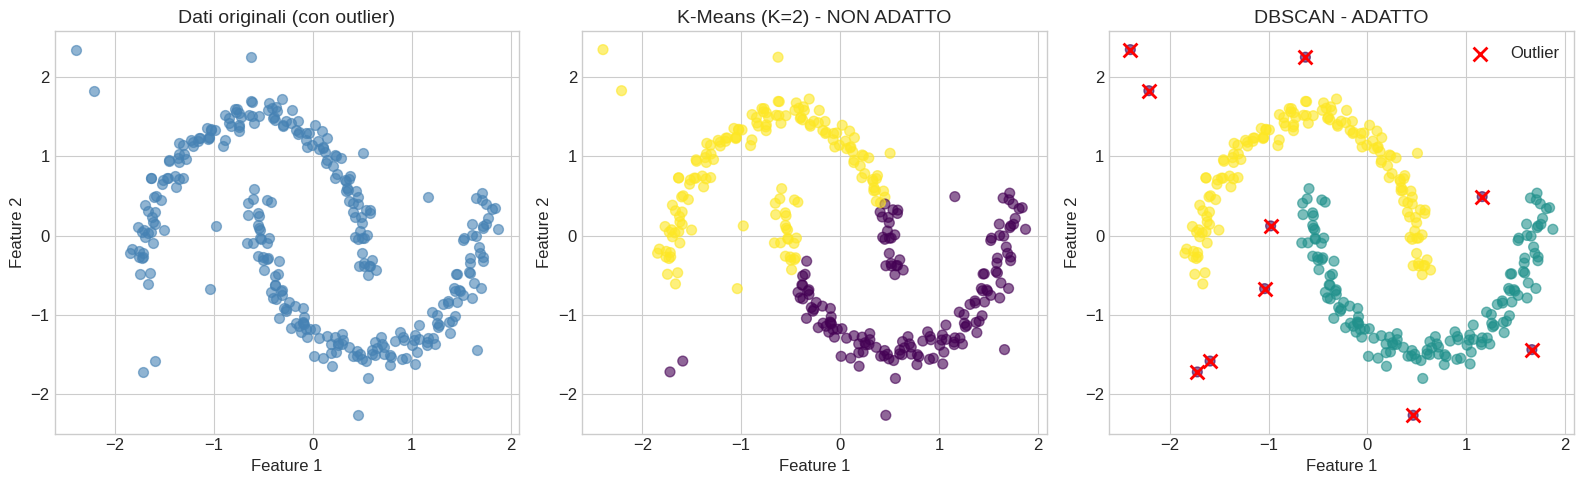

RISULTATI DBSCAN
Numero di cluster trovati: 2
Punti classificati come rumore: 10
Silhouette Score (escludendo rumore): 0.388


In [5]:
# SEZIONE 2.2: DBSCAN
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons, make_blobs
from sklearn.cluster import DBSCAN, KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

# Dataset a forma di luna - cluster non sferici
X_moons, y_moons = make_moons(n_samples=300, noise=0.05, random_state=42)
scaler_dbscan = StandardScaler()
X_moons_scaled = scaler_dbscan.fit_transform(X_moons)

# Aggiungiamo outlier
np.random.seed(42)
outliers = np.random.uniform(low=-2.5, high=2.5, size=(15, 2))
X_moons_with_outliers = np.vstack([X_moons_scaled, outliers])

# Confronto K-Means vs DBSCAN
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Dati originali
axes[0].scatter(X_moons_with_outliers[:, 0], X_moons_with_outliers[:, 1],
                c='steelblue', alpha=0.6, s=50)
axes[0].set_title('Dati originali (con outlier)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# K-Means (fallisce con cluster non sferici)
kmeans_moons = KMeans(n_clusters=2, random_state=42)
labels_kmeans_moons = kmeans_moons.fit_predict(X_moons_with_outliers)
axes[1].scatter(X_moons_with_outliers[:, 0], X_moons_with_outliers[:, 1],
                c=labels_kmeans_moons, cmap='viridis', alpha=0.6, s=50)
axes[1].set_title('K-Means (K=2) - NON ADATTO', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# DBSCAN
dbscan_model = DBSCAN(
    eps=0.3,          # Raggio del vicinato
    min_samples=5,    # Punti minimi per definire core point
    metric='euclidean'
)
labels_dbscan = dbscan_model.fit_predict(X_moons_with_outliers)

# Colorazione: outlier in nero
colors_dbscan = labels_dbscan.copy()
scatter = axes[2].scatter(X_moons_with_outliers[:, 0], X_moons_with_outliers[:, 1],
                          c=colors_dbscan, cmap='viridis', alpha=0.6, s=50)

# Evidenzia outlier
outlier_mask = labels_dbscan == -1
axes[2].scatter(X_moons_with_outliers[outlier_mask, 0],
                X_moons_with_outliers[outlier_mask, 1],
                c='red', marker='x', s=100, linewidths=2, label='Outlier')
axes[2].set_title('DBSCAN - ADATTO', fontsize=14)
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')
axes[2].legend()

plt.tight_layout()
plt.show()

# Statistiche
n_clusters_dbscan = len(set(labels_dbscan)) - (1 if -1 in labels_dbscan else 0)
n_noise_dbscan = list(labels_dbscan).count(-1)

print("=" * 50)
print("RISULTATI DBSCAN")
print("=" * 50)
print(f"Numero di cluster trovati: {n_clusters_dbscan}")
print(f"Punti classificati come rumore: {n_noise_dbscan}")

# Silhouette solo sui punti non rumore
if n_clusters_dbscan > 1:
    mask_non_noise = labels_dbscan != -1
    sil_score = silhouette_score(X_moons_with_outliers[mask_non_noise],
                                  labels_dbscan[mask_non_noise])
    print(f"Silhouette Score (escludendo rumore): {sil_score:.3f}")

**Osservazioni importanti su DBSCAN**

- La scelta di `eps` e cruciale: troppo piccolo = troppi cluster/rumore, troppo grande = pochi cluster
- Usare il k-distance graph per stimare `eps` ottimale
- `min_samples` tipicamente >= dimensionalita + 1
- Etichetta -1 indica rumore/outlier

**Quando usare DBSCAN**

- Cluster di forma non sferica (lune, cerchi concentrici)
- Presenza di outlier significativi
- Non si conosce il numero di cluster
- Dati con densita relativamente uniforme

### 2.3 Clustering Gerarchico

Il **clustering gerarchico** costruisce una gerarchia di cluster, rappresentabile tramite un **dendrogramma**. Esistono due approcci:

- **Agglomerativo** (bottom-up): ogni punto inizia come cluster singolo, poi si fondono
- **Divisivo** (top-down): tutti i punti iniziano in un cluster, poi si dividono

L'approccio agglomerativo e il piu comune e richiede una **strategia di linkage**:

| Linkage | Descrizione | Caratteristiche |
|---------|-------------|----------------|
| **Single** | Distanza minima tra punti | Sensibile al rumore, cluster allungati |
| **Complete** | Distanza massima tra punti | Cluster compatti |
| **Average** | Distanza media | Compromesso |
| **Ward** | Minimizza varianza intra-cluster | Cluster sferici, simile a K-Means |

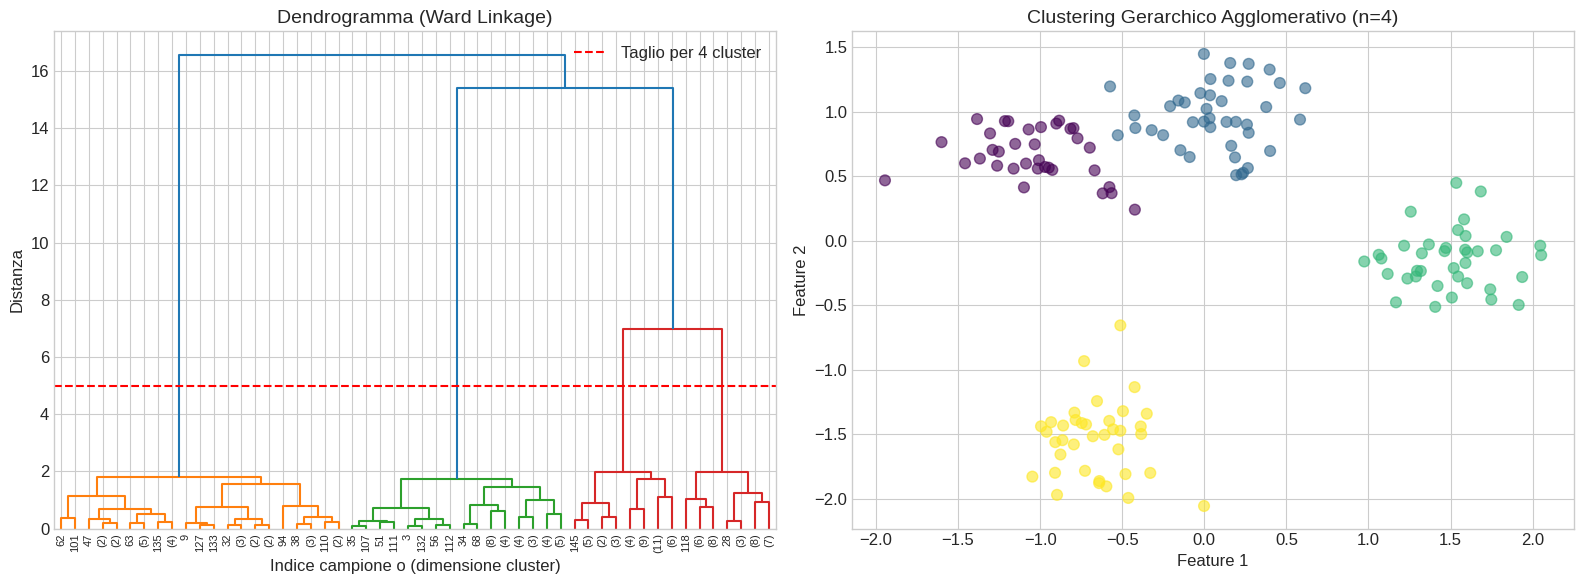

CONFRONTO STRATEGIE DI LINKAGE
Ward       Linkage - Silhouette: 0.681
Complete   Linkage - Silhouette: 0.655
Average    Linkage - Silhouette: 0.680
Single     Linkage - Silhouette: 0.568


In [27]:
# SEZIONE 2.3: Clustering Gerarchico
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.metrics import silhouette_score

# Generazione dati con cluster piu vicini
# per evidenziare le differenze tra strategie
X_hier, _ = make_blobs(
    n_samples=150, n_features=2,
    centers=4, cluster_std=1.5,
    random_state=42
)
scaler_hier = StandardScaler()
X_hier_scaled = scaler_hier.fit_transform(X_hier)

# Dendrogramma
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Calcolo linkage per dendrogramma
Z = linkage(X_hier_scaled, method='ward')

# Plot dendrogramma
dendrogram(
    Z, ax=axes[0], truncate_mode='level', p=5,
    leaf_rotation=90, leaf_font_size=8
)
axes[0].set_title(
    'Dendrogramma (Ward Linkage)', fontsize=14
)
axes[0].set_xlabel(
    'Indice campione o (dimensione cluster)'
)
axes[0].set_ylabel('Distanza')
axes[0].axhline(
    y=5, color='red', linestyle='--',
    label='Taglio per 4 cluster'
)
axes[0].legend()

# Clustering agglomerativo
agg_clustering = AgglomerativeClustering(
    n_clusters=4,
    linkage='ward'
)
labels_hier = agg_clustering.fit_predict(X_hier_scaled)

# Visualizzazione cluster
scatter = axes[1].scatter(
    X_hier_scaled[:, 0], X_hier_scaled[:, 1],
    c=labels_hier, cmap='viridis', alpha=0.6, s=60
)
axes[1].set_title(
    'Clustering Gerarchico Agglomerativo (n=4)',
    fontsize=14
)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Confronto linkage strategies
print("=" * 50)
print("CONFRONTO STRATEGIE DI LINKAGE")
print("=" * 50)

for linkage_type in [
    'ward', 'complete', 'average', 'single'
]:
    agg = AgglomerativeClustering(
        n_clusters=4, linkage=linkage_type
    )
    labels = agg.fit_predict(X_hier_scaled)
    score = silhouette_score(X_hier_scaled, labels)
    print(
        f"{linkage_type.capitalize():10} Linkage"
        f" - Silhouette: {score:.3f}"
    )

**Osservazioni importanti sul Clustering Gerarchico**

- Il dendrogramma permette di visualizzare la struttura gerarchica e scegliere il numero di cluster
- Ward linkage tende a creare cluster di dimensioni simili
- Complessita $O(n^2)$ in memoria e $O(n^3)$ in tempo: non adatto a grandi dataset

**Quando usare il Clustering Gerarchico**

- Dataset di dimensioni moderate (< 10.000 punti)
- Quando si vuole visualizzare la struttura gerarchica
- Per analisi esplorative
- Quando non si conosce il numero ottimale di cluster

### 2.4 Gaussian Mixture Models (GMM)

I **Gaussian Mixture Models** rappresentano i dati come una miscela di distribuzioni gaussiane. A differenza di K-Means, GMM fornisce una **probabilita di appartenenza** a ciascun cluster (soft clustering).

#### Matematica di GMM

La probabilita di un punto $x$ e:

$$p(x) = \sum_{k=1}^{K} \pi_k \mathcal{N}(x | \mu_k, \Sigma_k)$$

dove:
- $\pi_k$ = peso della componente $k$ (somma a 1)
- $\mu_k$ = media della gaussiana $k$
- $\Sigma_k$ = matrice di covarianza della gaussiana $k$

L'algoritmo **Expectation-Maximization (EM)** ottimizza iterativamente i parametri.

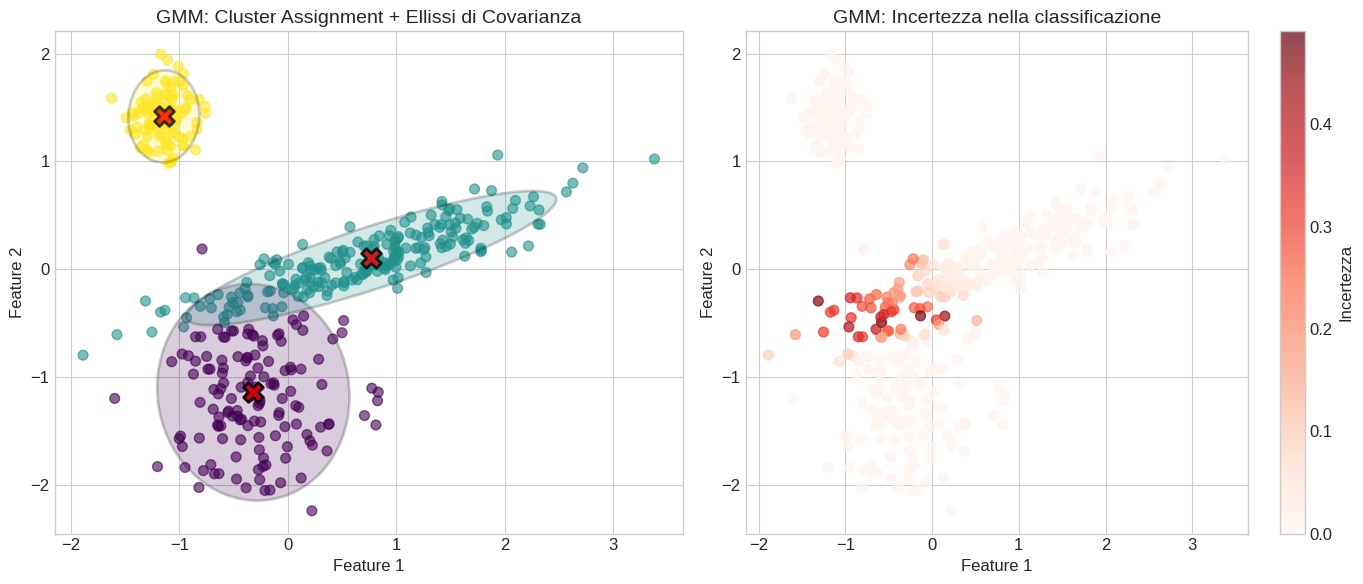

SELEZIONE NUMERO DI COMPONENTI
Numero ottimale di componenti (BIC): 3
Numero ottimale di componenti (AIC): 3


In [7]:
# SEZIONE 2.4: Gaussian Mixture Models
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler
from matplotlib.patches import Ellipse

# Generazione dati con cluster di dimensioni diverse
np.random.seed(42)
n1, n2, n3 = 100, 200, 150

# Cluster 1: piccolo e compatto
cluster1 = np.random.randn(n1, 2) * 0.5 + np.array([-3, 3])
# Cluster 2: allungato
cluster2 = np.random.randn(n2, 2) @ np.array([[2, 0.5], [0.5, 0.5]]) + np.array([2, 0])
# Cluster 3: grande
cluster3 = np.random.randn(n3, 2) * 1.2 + np.array([-1, -3])

X_gmm = np.vstack([cluster1, cluster2, cluster3])
scaler_gmm = StandardScaler()
X_gmm_scaled = scaler_gmm.fit_transform(X_gmm)

# Fit GMM
gmm = GaussianMixture(
    n_components=3,
    covariance_type='full',  # Matrice di covarianza completa
    random_state=42,
    n_init=5
)
labels_gmm = gmm.fit_predict(X_gmm_scaled)
probs_gmm = gmm.predict_proba(X_gmm_scaled)

# Funzione per disegnare ellissi di confidenza
def draw_ellipse(position, covariance, ax, **kwargs):
    """Disegna ellisse di confidenza per una gaussiana"""
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s) * 2  # 2 deviazioni standard
    else:
        angle = 0
        width = height = 2 * np.sqrt(covariance) * 2

    ellipse = Ellipse(position, width, height, angle=angle, **kwargs)
    ax.add_patch(ellipse)

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Hard assignment
scatter1 = axes[0].scatter(X_gmm_scaled[:, 0], X_gmm_scaled[:, 1],
                           c=labels_gmm, cmap='viridis', alpha=0.6, s=50)
axes[0].scatter(gmm.means_[:, 0], gmm.means_[:, 1],
                c='red', marker='X', s=200, edgecolors='black', linewidths=2)

# Disegna ellissi
for i, (mean, cov) in enumerate(zip(gmm.means_, gmm.covariances_)):
    draw_ellipse(mean, cov, axes[0], alpha=0.2,
                 facecolor=plt.cm.viridis(i/2), edgecolor='black', linewidth=2)

axes[0].set_title('GMM: Cluster Assignment + Ellissi di Covarianza', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Probabilita di appartenenza (incertezza)
uncertainty = 1 - probs_gmm.max(axis=1)  # Maggiore = piu incerto
scatter2 = axes[1].scatter(X_gmm_scaled[:, 0], X_gmm_scaled[:, 1],
                           c=uncertainty, cmap='Reds', alpha=0.7, s=50)
plt.colorbar(scatter2, ax=axes[1], label='Incertezza')
axes[1].set_title('GMM: Incertezza nella classificazione', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Selezione del numero di componenti con BIC/AIC
print("=" * 50)
print("SELEZIONE NUMERO DI COMPONENTI")
print("=" * 50)

n_components_range = range(1, 8)
bic_scores = []
aic_scores = []

for n in n_components_range:
    gmm_temp = GaussianMixture(n_components=n, random_state=42)
    gmm_temp.fit(X_gmm_scaled)
    bic_scores.append(gmm_temp.bic(X_gmm_scaled))
    aic_scores.append(gmm_temp.aic(X_gmm_scaled))

print(f"Numero ottimale di componenti (BIC): {np.argmin(bic_scores) + 1}")
print(f"Numero ottimale di componenti (AIC): {np.argmin(aic_scores) + 1}")

**Osservazioni importanti su GMM**

- Fornisce probabilita di appartenenza (utile quando i cluster si sovrappongono)
- Puo modellare cluster ellittici con `covariance_type='full'`
- Usare BIC o AIC per selezionare il numero di componenti
- Piu flessibile di K-Means ma piu costoso computazionalmente

**Quando usare GMM**

- Cluster di forma ellittica
- Quando serve la probabilita di appartenenza
- Cluster sovrapposti
- Come modello generativo

### Riepilogo: Confronto algoritmi di clustering

| Algoritmo | Richiede K | Forma cluster | Outlier | Complessita | Uso tipico |
|-----------|------------|---------------|---------|-------------|------------|
| **K-Means** | Si | Sferici | No | O(n*k*i) | Segmentazione clienti |
| **DBSCAN** | No | Arbitraria | Si | O(n log n) | Dati spaziali |
| **Hierarchical** | Opzionale | Varia | No | O(n³) | Biologia, tassonomie |
| **GMM** | Si | Ellittici | No | O(n*k*i) | Soft clustering |

---

## ESERCIZIO 1: Clustering su dati reali

Applica K-Means e DBSCAN al dataset Wine di sklearn. Confronta i risultati usando il Silhouette Score.

In [8]:
# ESERCIZIO 1: Clustering su dataset Wine

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score

# Caricamento e preprocessing
wine = load_wine()
X_wine = wine.data
scaler_wine = StandardScaler()
X_wine_scaled = scaler_wine.fit_transform(X_wine)

print(f"Dimensioni dataset: {X_wine_scaled.shape}")
print(
    f"Numero di classi reali: "
    f"{len(set(wine.target))}"
)


def esercizio_clustering(
    X,
    n_clusters_kmeans=3,
    eps_dbscan=2.1,
    min_samples_dbscan=5
):
    """
    Applica K-Means e DBSCAN ai dati e
    restituisce i silhouette scores.

    Parametri:
    - X: dati standardizzati
    - n_clusters_kmeans: numero di cluster per K-Means
    - eps_dbscan: epsilon per DBSCAN
    - min_samples_dbscan: min_samples per DBSCAN

    Ritorna:
    - tuple: (sil_kmeans, sil_dbscan,
              labels_kmeans, labels_dbscan)
    """
    # K-Means
    kmeans = KMeans(
        n_clusters=n_clusters_kmeans,
        random_state=42,
        n_init=10
    )
    labels_kmeans = kmeans.fit_predict(X)
    sil_kmeans = silhouette_score(X, labels_kmeans)

    # DBSCAN
    dbscan = DBSCAN(
        eps=eps_dbscan,
        min_samples=min_samples_dbscan
    )
    labels_dbscan = dbscan.fit_predict(X)

    # Silhouette per DBSCAN (escludi rumore -1)
    mask_non_noise = labels_dbscan != -1
    n_clusters_found = len(
        set(labels_dbscan[mask_non_noise])
    )
    if n_clusters_found > 1:
        sil_dbscan = silhouette_score(
            X[mask_non_noise],
            labels_dbscan[mask_non_noise]
        )
    else:
        sil_dbscan = -1

    return (
        sil_kmeans, sil_dbscan,
        labels_kmeans, labels_dbscan
    )


# Test della funzione
sil_km, sil_db, labels_km, labels_db = (
    esercizio_clustering(X_wine_scaled)
)
print(f"Silhouette K-Means: {sil_km:.3f}")
print(f"Silhouette DBSCAN: {sil_db:.3f}")
n_clusters_db = (
    len(set(labels_db))
    - (1 if -1 in labels_db else 0)
)
print(f"Cluster DBSCAN trovati: {n_clusters_db}")
print(
    f"Punti rumore DBSCAN: "
    f"{sum(labels_db == -1)}"
)

Dimensioni dataset: (178, 13)
Numero di classi reali: 3
Silhouette K-Means: 0.285
Silhouette DBSCAN: 0.222
Cluster DBSCAN trovati: 3
Punti rumore DBSCAN: 62


---

## 3. Riduzione della Dimensionalita

La **riduzione della dimensionalita** trasforma dati ad alta dimensionalita in uno spazio a dimensionalita ridotta, preservando le informazioni piu importanti.

### Perche ridurre la dimensionalita?

1. **Visualizzazione**: proiettare dati in 2D o 3D per esplorazione
2. **Curse of Dimensionality**: in alta dimensionalita, i punti diventano equidistanti
3. **Riduzione del rumore**: eliminare feature irrilevanti
4. **Preprocessing**: ridurre costi computazionali per modelli successivi
5. **Feature extraction**: creare nuove feature piu informative

### Tecniche lineari vs non-lineari

| Tipo | Tecniche | Caratteristiche |
|------|----------|----------------|
| **Lineare** | PCA, LDA | Veloci, interpretabili, preservano struttura globale |
| **Non-lineare** | t-SNE, UMAP | Preservano struttura locale, migliori per visualizzazione |

### 3.1 Principal Component Analysis (PCA)

**PCA** e la tecnica di riduzione dimensionale piu utilizzata. Trova le direzioni di massima varianza nei dati (componenti principali) e proietta i dati su queste direzioni.

#### Matematica di PCA

1. Centrare i dati: $X_{centered} = X - \bar{X}$
2. Calcolare la matrice di covarianza: $C = \frac{1}{n-1} X_{centered}^T X_{centered}$
3. Calcolare autovalori e autovettori di $C$
4. Ordinare per autovalore decrescente
5. Proiettare: $X_{new} = X_{centered} \cdot V_k$ (dove $V_k$ sono i primi $k$ autovettori)

La **varianza spiegata** indica quanta informazione e preservata:

$$\text{Varianza spiegata}_i = \frac{\lambda_i}{\sum_j \lambda_j}$$

Dimensioni originali: (1797, 64)
Ogni immagine e 8x8 pixels


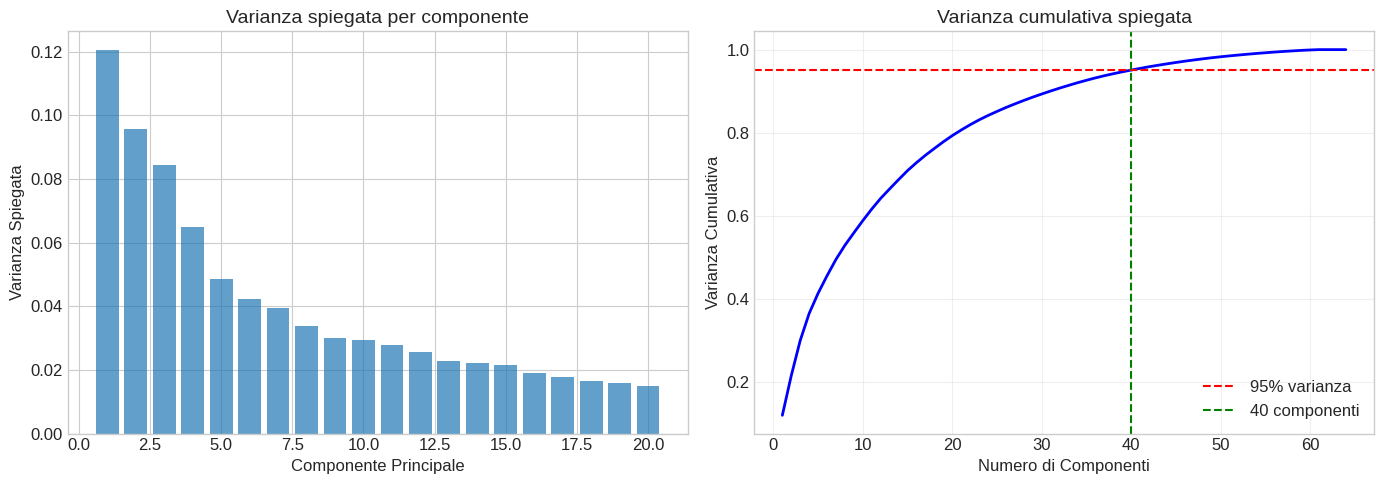


Componenti necessarie per 95% della varianza: 40
Riduzione dimensionalita: 64 -> 40 (62.5%)


In [9]:
# SEZIONE 3.1: PCA
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Caricamento dataset MNIST (cifre scritte a mano)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

print(f"Dimensioni originali: {X_digits.shape}")
print(f"Ogni immagine e {int(np.sqrt(X_digits.shape[1]))}x{int(np.sqrt(X_digits.shape[1]))} pixels")

# Standardizzazione
scaler_pca = StandardScaler()
X_digits_scaled = scaler_pca.fit_transform(X_digits)

# PCA con tutte le componenti per analizzare la varianza
pca_full = PCA()
pca_full.fit(X_digits_scaled)

# Varianza spiegata cumulativa
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Visualizzazione varianza spiegata
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Varianza spiegata per componente
axes[0].bar(range(1, 21), pca_full.explained_variance_ratio_[:20], alpha=0.7)
axes[0].set_xlabel('Componente Principale', fontsize=12)
axes[0].set_ylabel('Varianza Spiegata', fontsize=12)
axes[0].set_title('Varianza spiegata per componente', fontsize=14)

# Varianza cumulativa
axes[1].plot(range(1, len(cumulative_variance) + 1), cumulative_variance, 'b-', linewidth=2)
axes[1].axhline(y=0.95, color='red', linestyle='--', label='95% varianza')
n_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
axes[1].axvline(x=n_components_95, color='green', linestyle='--',
                label=f'{n_components_95} componenti')
axes[1].set_xlabel('Numero di Componenti', fontsize=12)
axes[1].set_ylabel('Varianza Cumulativa', fontsize=12)
axes[1].set_title('Varianza cumulativa spiegata', fontsize=14)
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\nComponenti necessarie per 95% della varianza: {n_components_95}")
print(f"Riduzione dimensionalita: {X_digits.shape[1]} -> {n_components_95} ({100*n_components_95/X_digits.shape[1]:.1f}%)")

/tmp/ipython-input-452289088.py:45: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


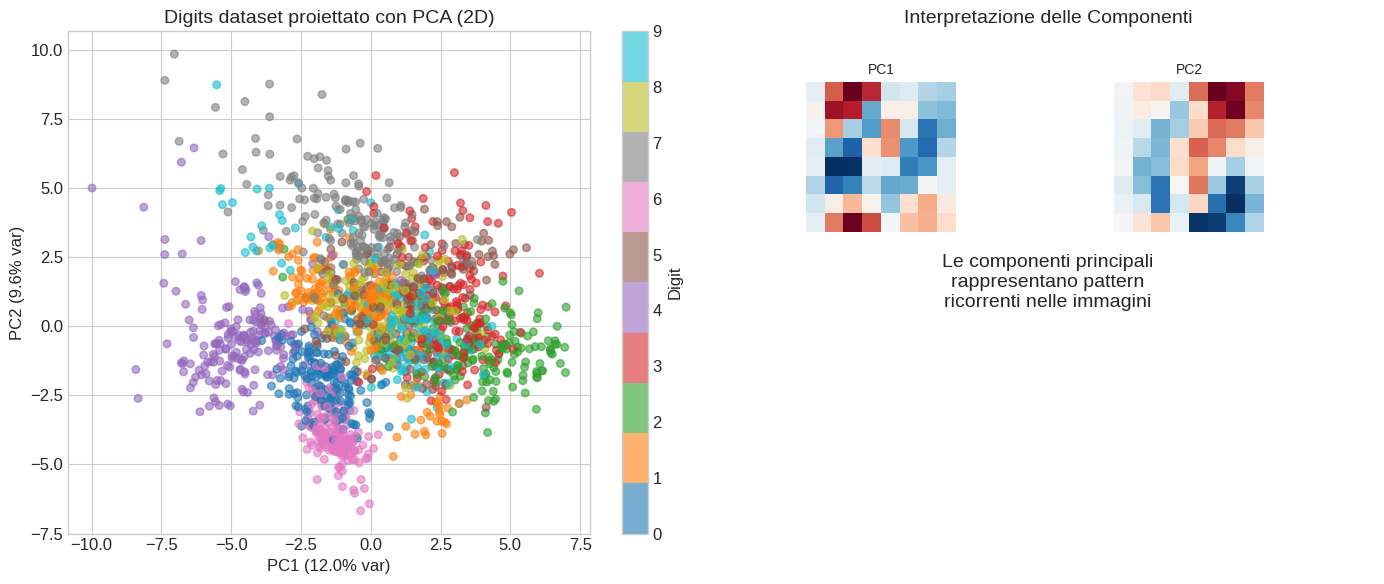

Varianza totale spiegata dalle prime 2 componenti: 21.6%


In [10]:
# Visualizzazione 2D con PCA

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Ricaricamento dati (incapsulamento)
digits = load_digits()
X_digits = digits.data
y_digits = digits.target

scaler_pca2d = StandardScaler()
X_digits_scaled = scaler_pca2d.fit_transform(X_digits)

# PCA a 2 componenti per visualizzazione
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_digits_scaled)

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter plot colorato per classe
scatter = axes[0].scatter(X_pca_2d[:, 0], X_pca_2d[:, 1],
                          c=y_digits, cmap='tab10', alpha=0.6, s=30)
plt.colorbar(scatter, ax=axes[0], label='Digit')
axes[0].set_xlabel(f'PC1 ({pca_2d.explained_variance_ratio_[0]*100:.1f}% var)', fontsize=12)
axes[0].set_ylabel(f'PC2 ({pca_2d.explained_variance_ratio_[1]*100:.1f}% var)', fontsize=12)
axes[0].set_title('Digits dataset proiettato con PCA (2D)', fontsize=14)

# Visualizzazione delle prime 2 componenti principali come immagini
for i, (comp, var) in enumerate(zip(pca_2d.components_[:2],
                                     pca_2d.explained_variance_ratio_[:2])):
    ax_inset = fig.add_axes([0.56 + i*0.22, 0.6, 0.15, 0.25])  # [left, bottom, width, height]
    ax_inset.imshow(comp.reshape(8, 8), cmap='RdBu_r')
    ax_inset.set_title(f'PC{i+1}', fontsize=10)
    ax_inset.axis('off')

axes[1].text(0.5, 0.5, 'Le componenti principali\nrappresentano pattern\nricorrenti nelle immagini',
             ha='center', va='center', fontsize=14, transform=axes[1].transAxes)
axes[1].axis('off')
axes[1].set_title('Interpretazione delle Componenti', fontsize=14)


plt.show()

print(f"Varianza totale spiegata dalle prime 2 componenti: {sum(pca_2d.explained_variance_ratio_)*100:.1f}%")

**Osservazioni importanti su PCA**

- Sempre standardizzare i dati prima di PCA
- Le componenti sono ordinate per varianza spiegata
- PCA e invertibile: possiamo ricostruire i dati originali (con perdita)
- Le componenti sono ortogonali tra loro

**Quando usare PCA**

- Riduzione dimensionale per preprocessing
- Rimozione rumore
- Compressione dati
- Quando le relazioni sono approssimativamente lineari

### 3.2 t-SNE (t-Distributed Stochastic Neighbor Embedding)

**t-SNE** e una tecnica non-lineare progettata specificamente per la **visualizzazione** di dati ad alta dimensionalita. Preserva la struttura locale trasformando le distanze in probabilita.

#### Come funziona t-SNE

1. Calcola le similarita tra punti nello spazio originale (distribuzione gaussiana)
2. Inizializza casualmente i punti nello spazio ridotto
3. Calcola le similarita nello spazio ridotto (distribuzione t di Student)
4. Minimizza la divergenza di Kullback-Leibler tra le due distribuzioni

#### Parametro chiave: Perplexity

La **perplexity** (tipicamente 5-50) controlla il bilanciamento tra struttura locale e globale:
- Bassa perplexity: focus sulla struttura locale
- Alta perplexity: considera piu vicini, struttura piu globale

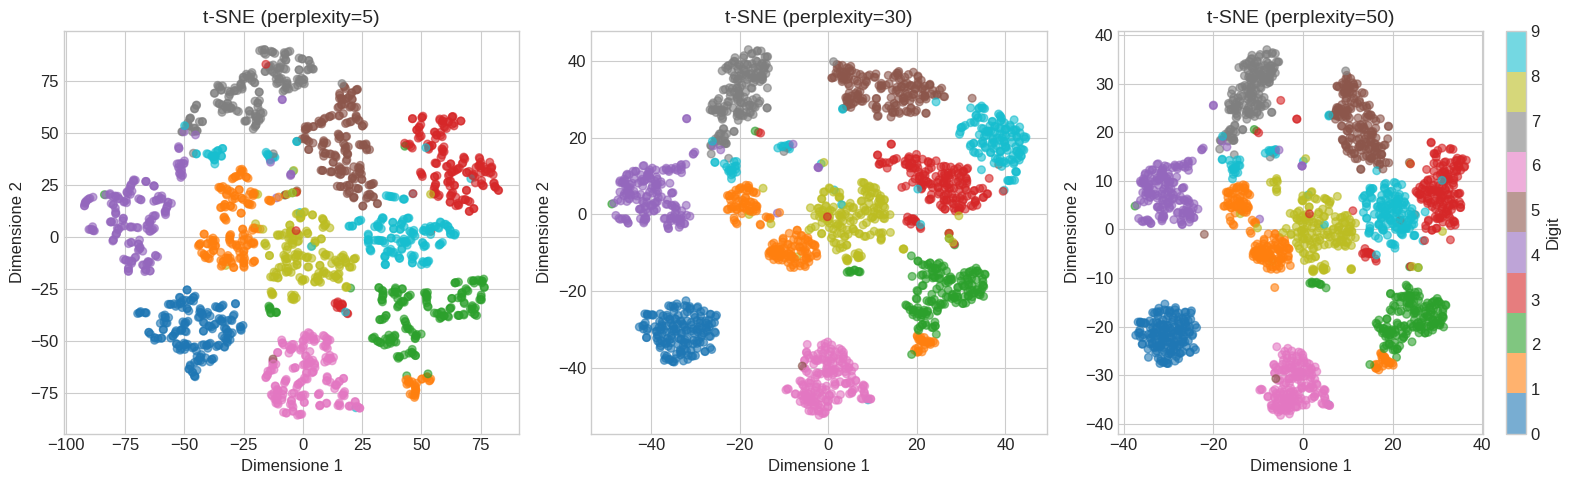

Nota: t-SNE separa molto bene i cluster ma le distanze tra cluster NON sono interpretabili.


In [11]:
# SEZIONE 3.2: t-SNE
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Caricamento dati
digits_tsne = load_digits()
X_tsne = digits_tsne.data
y_tsne = digits_tsne.target

# Standardizzazione
scaler_tsne = StandardScaler()
X_tsne_scaled = scaler_tsne.fit_transform(X_tsne)

# Confronto diverse perplexity
perplexities = [5, 30, 50]

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

for ax, perp in zip(axes, perplexities):
    tsne = TSNE(
        n_components=2,
        perplexity=perp,
        learning_rate='auto',
        init='pca',
        random_state=42,
        max_iter=1000
    )
    X_tsne_2d = tsne.fit_transform(X_tsne_scaled)

    scatter = ax.scatter(X_tsne_2d[:, 0], X_tsne_2d[:, 1],
                         c=y_tsne, cmap='tab10', alpha=0.6, s=30)
    ax.set_title(f't-SNE (perplexity={perp})', fontsize=14)
    ax.set_xlabel('Dimensione 1')
    ax.set_ylabel('Dimensione 2')

plt.colorbar(scatter, ax=axes[-1], label='Digit')
plt.tight_layout()
plt.show()

print("Nota: t-SNE separa molto bene i cluster ma le distanze tra cluster NON sono interpretabili.")

**Osservazioni importanti su t-SNE**

- Le distanze tra cluster NON sono significative (solo quelle all'interno)
- Non deterministico: risultati diversi a ogni run
- Lento su grandi dataset: $O(n^2)$
- Non adatto per riduzione dimensionale come preprocessing

**Quando usare t-SNE**

- Visualizzazione di dati complessi
- Esplorazione di cluster
- Dataset di dimensioni moderate (< 10.000 punti)

### 3.3 UMAP (Uniform Manifold Approximation and Projection)

**UMAP** e una tecnica piu recente che combina i vantaggi di PCA e t-SNE. E piu veloce di t-SNE e preserva meglio la struttura globale.

#### Vantaggi di UMAP rispetto a t-SNE

| Caratteristica | t-SNE | UMAP |
|----------------|-------|------|
| Velocita | Lento | Veloce |
| Struttura globale | Scarsa | Buona |
| Scalabilita | Limitata | Buona |
| Riproducibilita | Bassa | Alta (con seed) |
| Uso come preprocessing | No | Si |

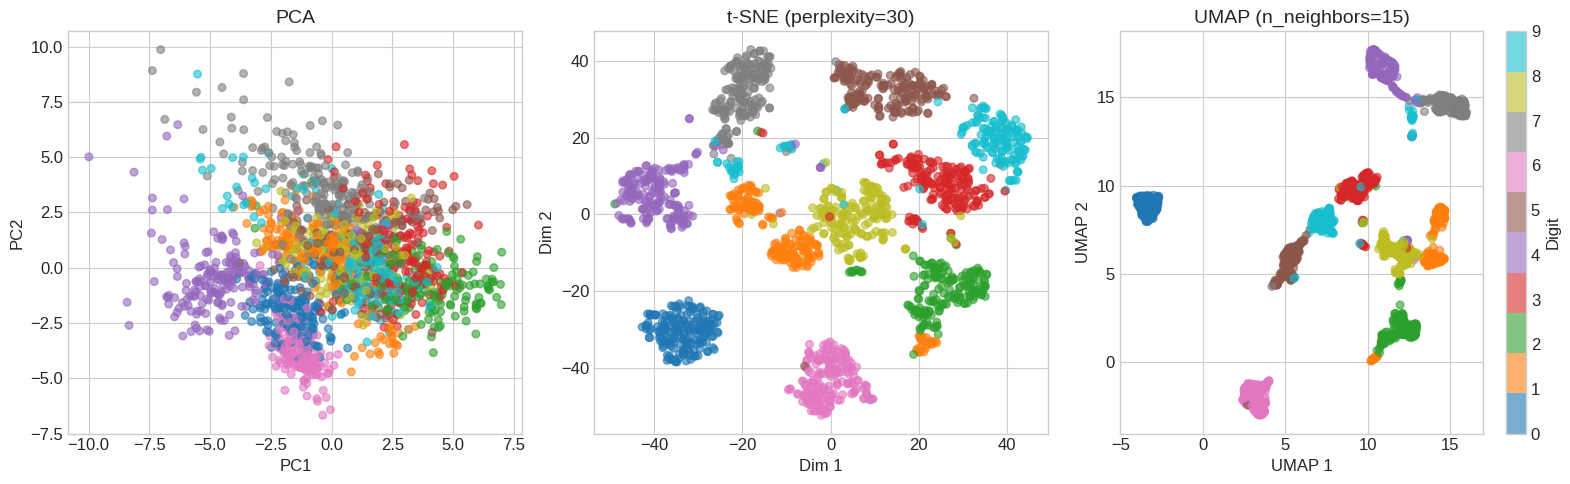

Nota: UMAP preserva meglio le relazioni tra cluster rispetto a t-SNE.


In [12]:
# SEZIONE 3.3: UMAP
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings('ignore')

# Caricamento dati
digits_umap = load_digits()
X_umap = digits_umap.data
y_umap = digits_umap.target

# Standardizzazione
scaler_umap = StandardScaler()
X_umap_scaled = scaler_umap.fit_transform(X_umap)

# Confronto PCA vs t-SNE vs UMAP
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# PCA
pca_compare = PCA(n_components=2)
X_pca = pca_compare.fit_transform(X_umap_scaled)
axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y_umap, cmap='tab10', alpha=0.6, s=30)
axes[0].set_title('PCA', fontsize=14)
axes[0].set_xlabel('PC1')
axes[0].set_ylabel('PC2')

# t-SNE
tsne_compare = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne_compare = tsne_compare.fit_transform(X_umap_scaled)
axes[1].scatter(X_tsne_compare[:, 0], X_tsne_compare[:, 1], c=y_umap, cmap='tab10', alpha=0.6, s=30)
axes[1].set_title('t-SNE (perplexity=30)', fontsize=14)
axes[1].set_xlabel('Dim 1')
axes[1].set_ylabel('Dim 2')

# UMAP
umap_model = umap.UMAP(
    n_components=2,
    n_neighbors=15,     # Simile a perplexity
    min_dist=0.1,       # Distanza minima tra punti nello spazio ridotto
    metric='euclidean',
    random_state=42
)
X_umap_2d = umap_model.fit_transform(X_umap_scaled)
scatter = axes[2].scatter(X_umap_2d[:, 0], X_umap_2d[:, 1], c=y_umap, cmap='tab10', alpha=0.6, s=30)
axes[2].set_title('UMAP (n_neighbors=15)', fontsize=14)
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')

plt.colorbar(scatter, ax=axes[-1], label='Digit')
plt.tight_layout()
plt.show()

print("Nota: UMAP preserva meglio le relazioni tra cluster rispetto a t-SNE.")

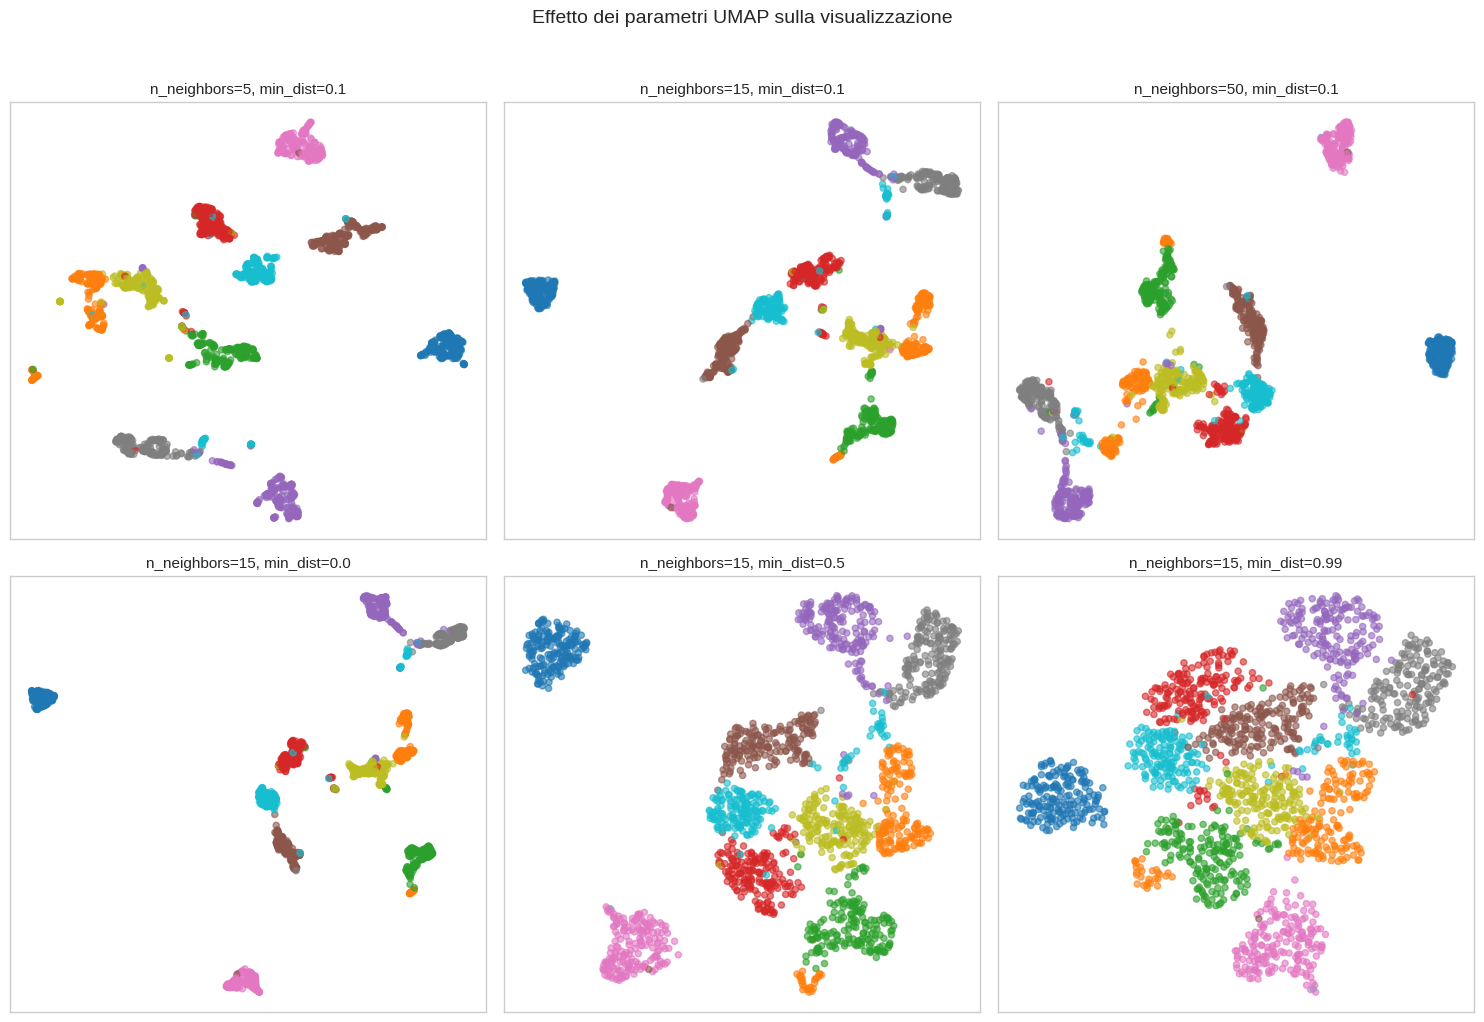

n_neighbors basso = struttura locale | alto = struttura globale
min_dist basso = cluster densi | alto = cluster sparsi


In [13]:
# Effetto dei parametri UMAP

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.preprocessing import StandardScaler
import umap
import warnings
warnings.filterwarnings('ignore')

# Ricaricamento dati
digits_params = load_digits()
X_params = digits_params.data
y_params = digits_params.target

scaler_params = StandardScaler()
X_params_scaled = scaler_params.fit_transform(X_params)

# Variazione parametri
params = [
    {'n_neighbors': 5, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.1},
    {'n_neighbors': 50, 'min_dist': 0.1},
    {'n_neighbors': 15, 'min_dist': 0.0},
    {'n_neighbors': 15, 'min_dist': 0.5},
    {'n_neighbors': 15, 'min_dist': 0.99},
]

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, param in zip(axes, params):
    reducer = umap.UMAP(n_components=2, random_state=42, **param)
    X_reduced = reducer.fit_transform(X_params_scaled)
    ax.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y_params, cmap='tab10', alpha=0.6, s=20)
    ax.set_title(f"n_neighbors={param['n_neighbors']}, min_dist={param['min_dist']}", fontsize=11)
    ax.set_xticks([])
    ax.set_yticks([])

plt.suptitle('Effetto dei parametri UMAP sulla visualizzazione', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

print("n_neighbors basso = struttura locale | alto = struttura globale")
print("min_dist basso = cluster densi | alto = cluster sparsi")

**Osservazioni importanti su UMAP**

- `n_neighbors` controlla il bilanciamento locale/globale (simile a perplexity)
- `min_dist` controlla quanto i punti possono avvicinarsi nella proiezione
- Puo essere usato come preprocessing per modelli ML
- Preserva meglio la topologia globale rispetto a t-SNE

**Quando usare UMAP**

- Dataset grandi (piu scalabile di t-SNE)
- Quando serve preservare struttura locale E globale
- Come preprocessing per clustering o classificazione
- Visualizzazione di embedding (NLP, immagini)

---

## ESERCIZIO 2: Confronto tecniche di riduzione dimensionale

Applica PCA, t-SNE e UMAP al dataset Iris e confronta visivamente i risultati.

Dimensioni originali: (150, 4)


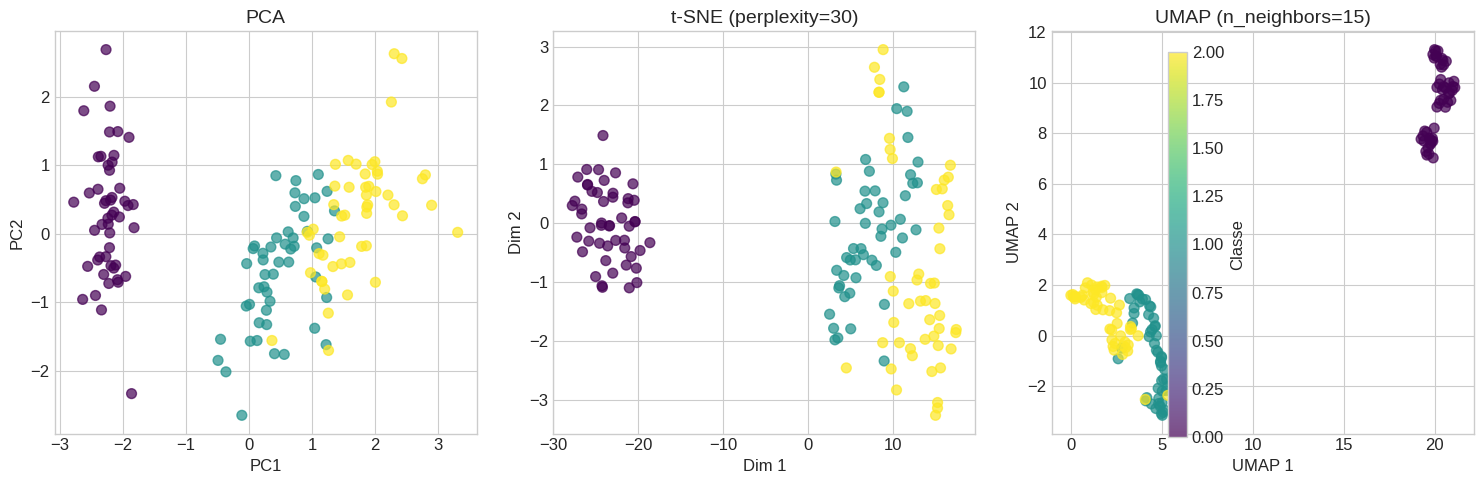

Shape PCA: (150, 2)
Shape t-SNE: (150, 2)
Shape UMAP: (150, 2)


In [14]:
# ESERCIZIO 2: Confronto PCA, t-SNE, UMAP su Iris

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import warnings
warnings.filterwarnings('ignore')

# Caricamento dati
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

print(f"Dimensioni originali: {X_iris_scaled.shape}")


def esercizio_dim_reduction(X, y):
    """
    Applica PCA, t-SNE e UMAP ai dati e crea un plot con 3 subplot.

    Parametri:
    - X: dati standardizzati (n_samples, n_features)
    - y: etichette per la colorazione

    Ritorna:
    - tuple: (X_pca, X_tsne, X_umap) - array 2D per ogni tecnica
    """
    # PCA
    X_pca = PCA(n_components=2).fit_transform(X)

    # t-SNE
    X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X)

    # UMAP
    X_umap = umap.UMAP(n_components=2, n_neighbors=15, random_state=42).fit_transform(X)

    # Visualizzazione
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    axes[0].scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
    axes[0].set_title('PCA', fontsize=14)
    axes[0].set_xlabel('PC1')
    axes[0].set_ylabel('PC2')

    axes[1].scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
    axes[1].set_title('t-SNE (perplexity=30)', fontsize=14)
    axes[1].set_xlabel('Dim 1')
    axes[1].set_ylabel('Dim 2')

    scatter = axes[2].scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', alpha=0.7, s=50)
    axes[2].set_title('UMAP (n_neighbors=15)', fontsize=14)
    axes[2].set_xlabel('UMAP 1')
    axes[2].set_ylabel('UMAP 2')

    plt.colorbar(scatter, ax=axes, label='Classe')
    plt.tight_layout()
    plt.show()

    return X_pca, X_tsne, X_umap


# Test della funzione
X_pca, X_tsne, X_umap = esercizio_dim_reduction(X_iris_scaled, y_iris)
print(f"Shape PCA: {X_pca.shape}")
print(f"Shape t-SNE: {X_tsne.shape}")
print(f"Shape UMAP: {X_umap.shape}")

---

## 4. Anomaly Detection

L'**Anomaly Detection** (o Outlier Detection) identifica osservazioni che deviano significativamente dal comportamento normale. E cruciale in:

- **Sicurezza**: rilevamento frodi, intrusioni di rete
- **Industria**: manutenzione predittiva, controllo qualita
- **Healthcare**: diagnosi di malattie rare
- **Data quality**: pulizia dati, identificazione errori

### Approcci all'Anomaly Detection

| Approccio | Descrizione | Esempi |
|-----------|-------------|--------|
| **Basato su distanza** | Anomalie lontane dalla maggioranza | LOF, k-NN |
| **Basato su densita** | Anomalie in regioni a bassa densita | DBSCAN, LOF |
| **Basato su isolamento** | Anomalie facili da isolare | Isolation Forest |
| **Statistico** | Anomalie che violano distribuzioni attese | Z-score, IQR |

### 4.1 Isolation Forest

**Isolation Forest** e un algoritmo efficiente basato sull'idea che le anomalie sono "poche e diverse", quindi piu facili da isolare con split casuali.

#### Come funziona

1. Costruisce un ensemble di alberi di isolamento (Isolation Trees)
2. Ogni albero partiziona casualmente i dati con split casuali
3. Le anomalie richiedono meno split per essere isolate (path piu corto)
4. L'anomaly score e basato sulla lunghezza media del path

$$s(x, n) = 2^{-\frac{E[h(x)]}{c(n)}}$$

dove $h(x)$ e la lunghezza del path e $c(n)$ e il valore atteso per un campione casuale.

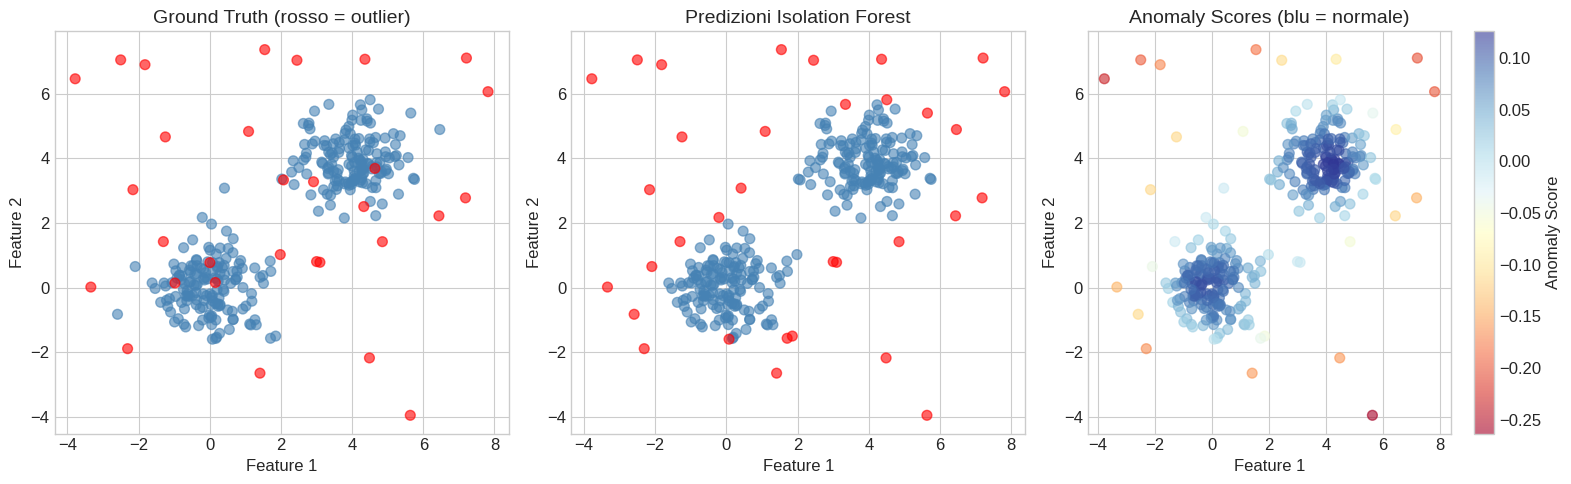

REPORT DI CLASSIFICAZIONE
               precision    recall  f1-score   support

Anomalia (-1)       0.67      0.73      0.70        30
  Normale (1)       0.97      0.96      0.97       300

     accuracy                           0.94       330
    macro avg       0.82      0.85      0.83       330
 weighted avg       0.95      0.94      0.94       330


Matrice di Confusione:
[[ 22   8]
 [ 11 289]]


In [15]:
# SEZIONE 4.1: Isolation Forest
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler

# Generazione dati con outlier
np.random.seed(42)

# Dati normali: 2 cluster
n_normal = 300
X_normal_1 = np.random.randn(n_normal // 2, 2) * 0.8 + np.array([0, 0])
X_normal_2 = np.random.randn(n_normal // 2, 2) * 0.8 + np.array([4, 4])
X_normal = np.vstack([X_normal_1, X_normal_2])

# Outlier sparsi
n_outliers = 30
X_outliers = np.random.uniform(low=-4, high=8, size=(n_outliers, 2))

# Dataset completo
X_if = np.vstack([X_normal, X_outliers])
y_true_if = np.array([1] * n_normal + [-1] * n_outliers)  # 1 = normale, -1 = anomalia

# Standardizzazione
scaler_if = StandardScaler()
X_if_scaled = scaler_if.fit_transform(X_if)

# Isolation Forest
iso_forest = IsolationForest(
    n_estimators=100,           # Numero di alberi
    contamination=0.1,          # Proporzione attesa di outlier (10%)
    max_samples='auto',         # Campioni per albero
    random_state=42,
    n_jobs=-1
)

# Fit e predict
y_pred_if = iso_forest.fit_predict(X_if_scaled)
scores_if = iso_forest.decision_function(X_if_scaled)

# Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Dati originali con ground truth
colors_true = ['steelblue' if y == 1 else 'red' for y in y_true_if]
axes[0].scatter(X_if[:, 0], X_if[:, 1], c=colors_true, alpha=0.6, s=50)
axes[0].set_title('Ground Truth (rosso = outlier)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# Predizioni Isolation Forest
colors_pred = ['steelblue' if y == 1 else 'red' for y in y_pred_if]
axes[1].scatter(X_if[:, 0], X_if[:, 1], c=colors_pred, alpha=0.6, s=50)
axes[1].set_title('Predizioni Isolation Forest', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

# Anomaly scores
scatter = axes[2].scatter(X_if[:, 0], X_if[:, 1], c=scores_if, cmap='RdYlBu', alpha=0.6, s=50)
plt.colorbar(scatter, ax=axes[2], label='Anomaly Score')
axes[2].set_title('Anomaly Scores (blu = normale)', fontsize=14)
axes[2].set_xlabel('Feature 1')
axes[2].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

# Metriche
from sklearn.metrics import classification_report, confusion_matrix

print("=" * 50)
print("REPORT DI CLASSIFICAZIONE")
print("=" * 50)
print(classification_report(y_true_if, y_pred_if, target_names=['Anomalia (-1)', 'Normale (1)']))

print("\nMatrice di Confusione:")
print(confusion_matrix(y_true_if, y_pred_if))

### 4.2 Local Outlier Factor (LOF)

**LOF** e un algoritmo basato sulla densita che confronta la densita locale di un punto con quella dei suoi vicini. Un punto con densita molto inferiore ai vicini e un outlier.

$$LOF(x) = \frac{\text{media densita vicini di } x}{\text{densita di } x}$$

- LOF $\approx 1$: densita simile ai vicini (normale)
- LOF $>> 1$: densita molto inferiore ai vicini (outlier)

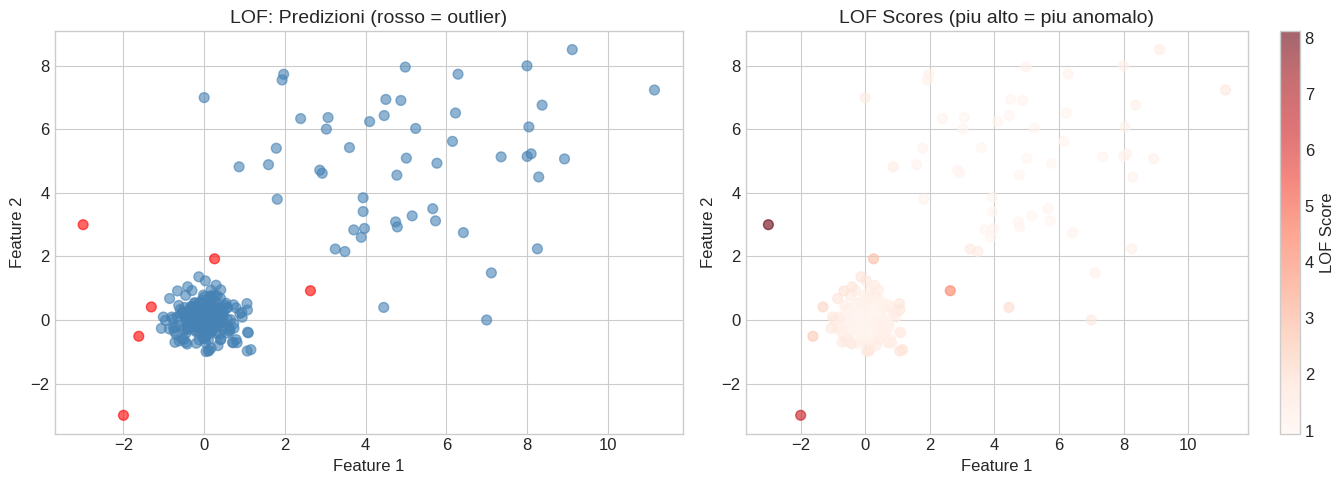

Outlier rilevati: 6
Top 5 punti con LOF piu alto: [250 253 215 104 131]


In [16]:
# SEZIONE 4.2: Local Outlier Factor
# Questa sezione e completamente incapsulata

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import StandardScaler

# Generazione dati con cluster di densita diversa
np.random.seed(42)

# Cluster denso
cluster_dense = np.random.randn(200, 2) * 0.5 + np.array([0, 0])
# Cluster sparso
cluster_sparse = np.random.randn(50, 2) * 2 + np.array([5, 5])
# Outlier
outliers_lof = np.array([[-3, 3], [7, 0], [0, 7], [-2, -3], [8, 8]])

X_lof = np.vstack([cluster_dense, cluster_sparse, outliers_lof])
y_true_lof = np.array([1] * 250 + [-1] * 5)

# Local Outlier Factor
lof = LocalOutlierFactor(
    n_neighbors=20,
    contamination=0.02,
    novelty=False  # Per outlier detection (non novelty detection)
)

y_pred_lof = lof.fit_predict(X_lof)
lof_scores = -lof.negative_outlier_factor_  # Convertiamo in positivo

# Visualizzazione
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Predizioni
colors_lof = ['steelblue' if y == 1 else 'red' for y in y_pred_lof]
axes[0].scatter(X_lof[:, 0], X_lof[:, 1], c=colors_lof, alpha=0.6, s=50)
axes[0].set_title('LOF: Predizioni (rosso = outlier)', fontsize=14)
axes[0].set_xlabel('Feature 1')
axes[0].set_ylabel('Feature 2')

# LOF scores
scatter = axes[1].scatter(X_lof[:, 0], X_lof[:, 1], c=lof_scores, cmap='Reds', alpha=0.6, s=50)
plt.colorbar(scatter, ax=axes[1], label='LOF Score')
axes[1].set_title('LOF Scores (piu alto = piu anomalo)', fontsize=14)
axes[1].set_xlabel('Feature 1')
axes[1].set_ylabel('Feature 2')

plt.tight_layout()
plt.show()

print(f"Outlier rilevati: {sum(y_pred_lof == -1)}")
print(f"Top 5 punti con LOF piu alto: {np.argsort(lof_scores)[-5:][::-1]}")

**Confronto Isolation Forest vs LOF**

| Caratteristica | Isolation Forest | LOF |
|----------------|-----------------|-----|
| **Approccio** | Isolamento | Densita locale |
| **Complessita** | O(n log n) | O(n^2) |
| **Scalabilita** | Eccellente | Moderata |
| **Cluster multidensita** | Difficolta | Gestisce bene |
| **Alta dimensionalita** | Funziona bene | Soffre |
| **Interpretabilita** | Media | Alta (LOF score) |

---

## 5. Association Rules

Le **Association Rules** (regole di associazione) scoprono relazioni interessanti tra variabili in grandi dataset. L'applicazione classica e la **Market Basket Analysis**: quali prodotti vengono acquistati insieme?

### Concetti fondamentali

Una regola ha la forma: $\{A\} \rightarrow \{B\}$ ("se A allora B")

**Metriche chiave**:

1. **Support**: frequenza con cui l'itemset appare
   $$\text{Support}(A \rightarrow B) = P(A \cap B)$$

2. **Confidence**: probabilita di B dato A
   $$\text{Confidence}(A \rightarrow B) = P(B|A) = \frac{P(A \cap B)}{P(A)}$$

3. **Lift**: quanto A aumenta la probabilita di B
   $$\text{Lift}(A \rightarrow B) = \frac{P(A \cap B)}{P(A) \cdot P(B)}$$
   - Lift > 1: associazione positiva
   - Lift = 1: indipendenza
   - Lift < 1: associazione negativa

### 5.1 Algoritmo Apriori

**Apriori** e l'algoritmo classico per trovare frequent itemsets e generare regole. Si basa sul principio: se un itemset e infrequente, tutti i suoi superset sono infrequenti.

In [17]:
# SEZIONE 5.1: Association Rules con Apriori
# Questa sezione e completamente incapsulata

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Dataset di transazioni (simulazione supermercato)
transactions = [
    ['Pane', 'Latte', 'Burro'],
    ['Pane', 'Latte'],
    ['Pane', 'Pannolini', 'Birra', 'Uova'],
    ['Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Cola'],
    ['Pane', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Burro', 'Uova'],
    ['Latte', 'Burro', 'Uova'],
    ['Pane', 'Latte', 'Birra'],
    ['Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Burro'],
    ['Latte', 'Uova'],
    ['Pannolini', 'Birra', 'Cola'],
]

# Encoding one-hot
te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

print("Dataset codificato (prime 5 transazioni):")
print(df_trans.head())
print(f"\nDimensioni: {df_trans.shape[0]} transazioni, {df_trans.shape[1]} prodotti")

Dataset codificato (prime 5 transazioni):
   Birra  Burro   Cola  Latte   Pane  Pannolini   Uova
0  False   True  False   True   True      False  False
1  False  False  False   True   True      False  False
2   True  False  False  False   True       True   True
3   True  False   True   True  False       True  False
4   True  False  False   True   True       True  False

Dimensioni: 15 transazioni, 7 prodotti


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


In [18]:
# Frequent Itemsets con Apriori

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Ricreo il dataset (incapsulamento)
transactions = [
    ['Pane', 'Latte', 'Burro'],
    ['Pane', 'Latte'],
    ['Pane', 'Pannolini', 'Birra', 'Uova'],
    ['Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Cola'],
    ['Pane', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Burro', 'Uova'],
    ['Latte', 'Burro', 'Uova'],
    ['Pane', 'Latte', 'Birra'],
    ['Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Burro'],
    ['Latte', 'Uova'],
    ['Pannolini', 'Birra', 'Cola'],
]

te = TransactionEncoder()
te_array = te.fit_transform(transactions)
df_trans = pd.DataFrame(te_array, columns=te.columns_)

# Trova itemset frequenti (support >= 30%)
frequent_itemsets = apriori(df_trans, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)

print("ITEMSET FREQUENTI (support >= 30%):")
print(frequent_itemsets.sort_values('support', ascending=False).head(10))

# Genera regole di associazione
rules = association_rules(
    frequent_itemsets,
    metric="confidence",
    min_threshold=0.6,
    num_itemsets=len(frequent_itemsets)
)

# Selezioniamo solo le colonne piu importanti
rules_display = rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].copy()
rules_display['antecedents'] = rules_display['antecedents'].apply(lambda x: ', '.join(list(x)))
rules_display['consequents'] = rules_display['consequents'].apply(lambda x: ', '.join(list(x)))

print("\n" + "=" * 60)
print("REGOLE DI ASSOCIAZIONE (confidence >= 60%):")
print("=" * 60)
print(rules_display.sort_values('lift', ascending=False).head(10).to_string(index=False))

ITEMSET FREQUENTI (support >= 30%):
    support            itemsets  length
1  0.733333             (Latte)       1
2  0.666667              (Pane)       1
0  0.533333             (Birra)       1
3  0.533333         (Pannolini)       1
7  0.466667       (Pane, Latte)       2
6  0.466667  (Pannolini, Birra)       2
5  0.333333       (Pane, Birra)       2
4  0.333333      (Latte, Birra)       2
8  0.333333  (Pannolini, Latte)       2
9  0.333333   (Pane, Pannolini)       2

REGOLE DI ASSOCIAZIONE (confidence >= 60%):
antecedents consequents  support  confidence     lift
      Birra   Pannolini 0.466667    0.875000 1.640625
  Pannolini       Birra 0.466667    0.875000 1.640625
      Latte        Pane 0.466667    0.636364 0.954545
       Pane       Latte 0.466667    0.700000 0.954545
  Pannolini        Pane 0.333333    0.625000 0.937500
      Birra        Pane 0.333333    0.625000 0.937500
      Birra       Latte 0.333333    0.625000 0.852273
  Pannolini       Latte 0.333333    0.625000 0.

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

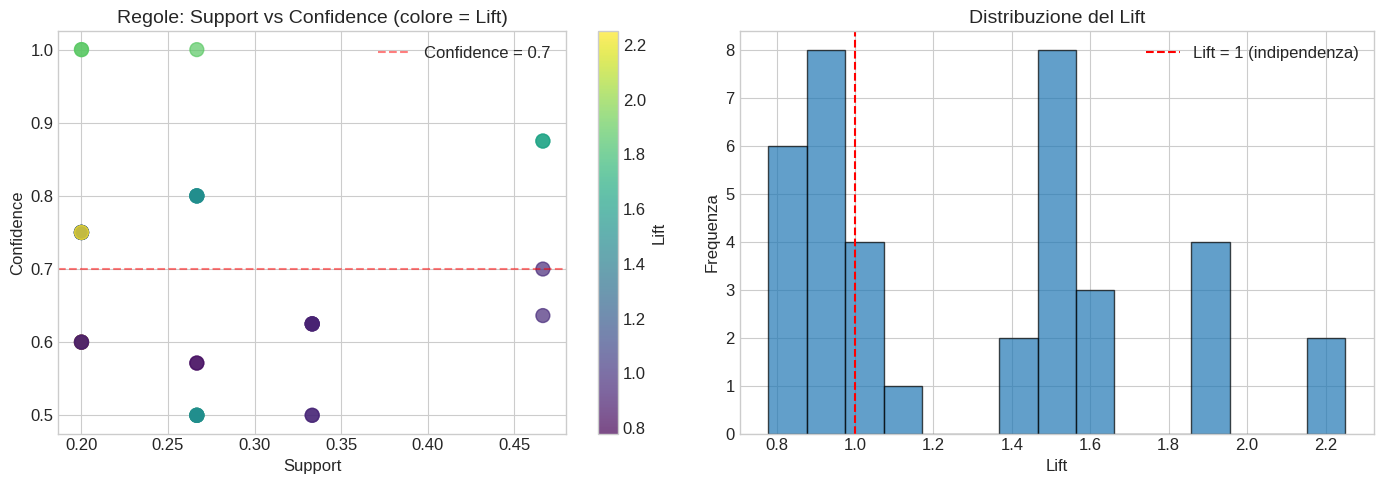

Nota: Lift > 1 indica associazione positiva (i prodotti si attraggono).


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

In [19]:
# Visualizzazione delle regole

import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Ricreo il dataset e le regole (incapsulamento)
transactions = [
    ['Pane', 'Latte', 'Burro'],
    ['Pane', 'Latte'],
    ['Pane', 'Pannolini', 'Birra', 'Uova'],
    ['Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Cola'],
    ['Pane', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Burro', 'Uova'],
    ['Latte', 'Burro', 'Uova'],
    ['Pane', 'Latte', 'Birra'],
    ['Latte', 'Pannolini', 'Birra'],
    ['Pane', 'Latte', 'Pannolini', 'Birra', 'Cola'],
    ['Pane', 'Burro'],
    ['Latte', 'Uova'],
    ['Pannolini', 'Birra', 'Cola'],
]

te = TransactionEncoder()
df_trans = pd.DataFrame(te.fit_transform(transactions), columns=te.columns_)
frequent_itemsets = apriori(df_trans, min_support=0.2, use_colnames=True)
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.5,
                          num_itemsets=len(frequent_itemsets))

# Scatter plot Support vs Confidence
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Support vs Confidence
scatter1 = axes[0].scatter(
    rules['support'],
    rules['confidence'],
    c=rules['lift'],
    cmap='viridis',
    s=100,
    alpha=0.7
)
plt.colorbar(scatter1, ax=axes[0], label='Lift')
axes[0].set_xlabel('Support', fontsize=12)
axes[0].set_ylabel('Confidence', fontsize=12)
axes[0].set_title('Regole: Support vs Confidence (colore = Lift)', fontsize=14)
axes[0].axhline(y=0.7, color='red', linestyle='--', alpha=0.5, label='Confidence = 0.7')
axes[0].legend()

# Distribuzione Lift
axes[1].hist(rules['lift'], bins=15, edgecolor='black', alpha=0.7)
axes[1].axvline(x=1, color='red', linestyle='--', label='Lift = 1 (indipendenza)')
axes[1].set_xlabel('Lift', fontsize=12)
axes[1].set_ylabel('Frequenza', fontsize=12)
axes[1].set_title('Distribuzione del Lift', fontsize=14)
axes[1].legend()

plt.tight_layout()
plt.show()

print("Nota: Lift > 1 indica associazione positiva (i prodotti si attraggono).")

**Osservazioni importanti sulle Association Rules**

- Support basso + Confidence alta = regola interessante ma rara
- Lift e la metrica piu informativa per identificare vere associazioni
- FP-Growth e piu efficiente di Apriori per grandi dataset
- Attenzione alle regole spurie: correlazione non implica causalita

**Applicazioni pratiche**

- Market basket analysis (cross-selling, layout negozio)
- Recommendation systems
- Web mining (pagine visitate insieme)
- Bioinformatica (geni co-espressi)

---

## ESERCIZIO 3: Anomaly Detection

Usa Isolation Forest per rilevare outlier nel dataset generato e confronta con il ground truth.

In [20]:
# ESERCIZIO 3: Anomaly Detection con Isolation Forest

import numpy as np
from sklearn.ensemble import IsolationForest
from sklearn.metrics import precision_score, recall_score, f1_score

# Generazione dati
np.random.seed(123)
X_normal = np.random.randn(500, 2)
X_anomaly = np.random.uniform(low=-4, high=4, size=(25, 2))
X_exercise = np.vstack([X_normal, X_anomaly])
y_true_exercise = np.array([1] * 500 + [-1] * 25)  # 1=normale, -1=anomalia

print(f"Dataset: {X_exercise.shape[0]} punti, {sum(y_true_exercise == -1)} anomalie")


def esercizio_anomaly_detection(X, contamination=0.05):
    """
    Applica Isolation Forest e restituisce le predizioni.

    Parametri:
    - X: dati (n_samples, n_features)
    - contamination: proporzione attesa di outlier

    Ritorna:
    - y_pred: array di predizioni (1=normale, -1=anomalia)
    """
    iso_forest = IsolationForest(n_estimators=100, contamination=contamination, random_state=42)
    y_pred = iso_forest.fit_predict(X)

    return y_pred


# Test della funzione
y_pred_exercise = esercizio_anomaly_detection(X_exercise, contamination=0.05)
print(f"Precision: {precision_score(y_true_exercise, y_pred_exercise, pos_label=-1):.3f}")
print(f"Recall: {recall_score(y_true_exercise, y_pred_exercise, pos_label=-1):.3f}")
print(f"F1-Score: {f1_score(y_true_exercise, y_pred_exercise, pos_label=-1):.3f}")
print(f"Anomalie rilevate: {sum(y_pred_exercise == -1)}")

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

Dataset: 525 punti, 25 anomalie


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)


Precision: 0.667
Recall: 0.720
F1-Score: 0.692
Anomalie rilevate: 27


/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---

## ESERCIZIO 4: Association Rules

Trova le regole di associazione con lift > 1.5 nel dataset fornito.

In [21]:
# ESERCIZIO 4: Association Rules Mining

import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

# Dataset di transazioni e-commerce
transactions_exercise = [
    ['Laptop', 'Mouse', 'Tastiera'],
    ['Laptop', 'Mouse'],
    ['Smartphone', 'Custodia', 'Caricatore'],
    ['Laptop', 'Mouse', 'Tastiera', 'Monitor'],
    ['Smartphone', 'Custodia'],
    ['Tablet', 'Custodia', 'Tastiera'],
    ['Laptop', 'Monitor'],
    ['Smartphone', 'Caricatore'],
    ['Laptop', 'Mouse', 'Monitor'],
    ['Tablet', 'Custodia'],
    ['Laptop', 'Tastiera'],
    ['Smartphone', 'Custodia', 'Caricatore', 'Auricolari'],
    ['Laptop', 'Mouse', 'Tastiera', 'Webcam'],
    ['Tablet', 'Tastiera'],
    ['Laptop', 'Mouse', 'Tastiera', 'Monitor', 'Webcam'],
]

# Encoding
te_ex = TransactionEncoder()
df_ex = pd.DataFrame(te_ex.fit_transform(transactions_exercise), columns=te_ex.columns_)

print(f"Dataset: {len(transactions_exercise)} transazioni, {len(te_ex.columns_)} prodotti")


def esercizio_association_rules(df_encoded, min_support=0.2, min_confidence=0.5, min_lift=1.5):
    """
    Trova regole di associazione con i parametri specificati.

    Parametri:
    - df_encoded: DataFrame one-hot encoded
    - min_support: supporto minimo per itemset
    - min_confidence: confidence minima per regole
    - min_lift: lift minimo per filtrare le regole

    Ritorna:
    - DataFrame con regole filtrate per lift >= min_lift
    """
    # Trova frequent itemsets
    frequent_itemsets = apriori(df_encoded, min_support=min_support, use_colnames=True)

    # Genera regole di associazione
    rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_confidence,
                              num_itemsets=len(frequent_itemsets))

    # Filtra per lift
    rules_filtered = rules[rules['lift'] >= min_lift]

    return rules_filtered


# Test della funzione
rules_filtered = esercizio_association_rules(df_ex)
print(f"\nRegole con lift >= 1.5: {len(rules_filtered)}")
print("\n" + "=" * 80)
print(rules_filtered[['antecedents', 'consequents', 'support', 'confidence', 'lift']].to_string())

Dataset: 15 transazioni, 10 prodotti

Regole con lift >= 1.5: 19

           antecedents         consequents   support  confidence   lift
0         (Smartphone)        (Caricatore)  0.200000    0.750000  3.750
1         (Caricatore)        (Smartphone)  0.200000    1.000000  3.750
2           (Custodia)        (Smartphone)  0.200000    0.600000  2.250
3         (Smartphone)          (Custodia)  0.200000    0.750000  2.250
4             (Laptop)           (Monitor)  0.266667    0.500000  1.875
5            (Monitor)            (Laptop)  0.266667    1.000000  1.875
6             (Laptop)             (Mouse)  0.400000    0.750000  1.875
7              (Mouse)            (Laptop)  0.400000    1.000000  1.875
10             (Mouse)           (Monitor)  0.200000    0.500000  1.875
11           (Monitor)             (Mouse)  0.200000    0.750000  1.875
14     (Laptop, Mouse)           (Monitor)  0.200000    0.500000  1.875
15   (Laptop, Monitor)             (Mouse)  0.200000    0.750000  1.87

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

---

## 6. Progetto Finale: Customer Segmentation

In questo progetto applicherai tutte le tecniche apprese per segmentare i clienti di un e-commerce basandosi sul loro comportamento d'acquisto.

### Obiettivi

1. Esplorare e preprocessare i dati
2. Ridurre la dimensionalita con PCA/UMAP
3. Applicare clustering (K-Means)
4. Identificare outlier con Isolation Forest
5. Interpretare e visualizzare i risultati

In [22]:
# PROGETTO FINALE: Customer Segmentation
# Questa sezione e completamente incapsulata

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
import umap
import warnings
warnings.filterwarnings('ignore')

# Generazione dataset realistico di clienti e-commerce
np.random.seed(42)
n_customers = 1000

# Feature RFM + comportamentali
data = {
    'customer_id': range(1, n_customers + 1),
    # Recency (giorni dall'ultimo acquisto)
    'recency': np.concatenate([
        np.random.exponential(15, 400),      # Clienti attivi
        np.random.exponential(60, 350),      # Clienti occasionali
        np.random.exponential(150, 250)      # Clienti dormienti
    ]),
    # Frequency (numero acquisti ultimi 12 mesi)
    'frequency': np.concatenate([
        np.random.poisson(15, 400),
        np.random.poisson(5, 350),
        np.random.poisson(1, 250)
    ]),
    # Monetary (spesa totale in euro)
    'monetary': np.concatenate([
        np.random.gamma(5, 200, 400),
        np.random.gamma(3, 100, 350),
        np.random.gamma(2, 50, 250)
    ]),
    # Altre feature
    'avg_basket_size': np.random.gamma(3, 30, n_customers),
    'n_categories': np.random.randint(1, 10, n_customers),
    'return_rate': np.random.beta(2, 10, n_customers),
    'discount_usage': np.random.beta(3, 7, n_customers),
}

df_customers = pd.DataFrame(data)

# Aggiungiamo alcuni outlier (clienti VIP o fraudolenti)
outlier_indices = np.random.choice(n_customers, 20, replace=False)
df_customers.loc[outlier_indices[:10], 'monetary'] *= 10  # VIP
df_customers.loc[outlier_indices[10:], 'return_rate'] = 0.8  # Alto tasso di reso

print("DATASET CLIENTI E-COMMERCE")
print("=" * 50)
print(df_customers.describe().round(2))

DATASET CLIENTI E-COMMERCE
       customer_id  recency  frequency  monetary  avg_basket_size  \
count      1000.00  1000.00    1000.00   1000.00          1000.00   
mean        500.50    61.28       8.00    559.34            90.05   
std         288.82    90.24       6.69    696.70            52.36   
min           1.00     0.08       0.00      6.70             7.11   
25%         250.75     8.67       2.00    139.94            52.19   
50%         500.50    25.71       6.00    352.94            78.91   
75%         750.25    72.61      14.00    858.86           118.69   
max        1000.00   865.21      27.00  11749.69           407.34   

       n_categories  return_rate  discount_usage  
count       1000.00      1000.00         1000.00  
mean           5.00         0.17            0.30  
std            2.55         0.12            0.14  
min            1.00         0.00            0.04  
25%            3.00         0.09            0.19  
50%            5.00         0.15            0

/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packages/jupyter_client/session.py:203: DeprecationWarning: datetime.datetime.utcnow() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.now(datetime.UTC).
  return datetime.utcnow().replace(tzinfo=utc)
/usr/local/lib/python3.12/dist-packag

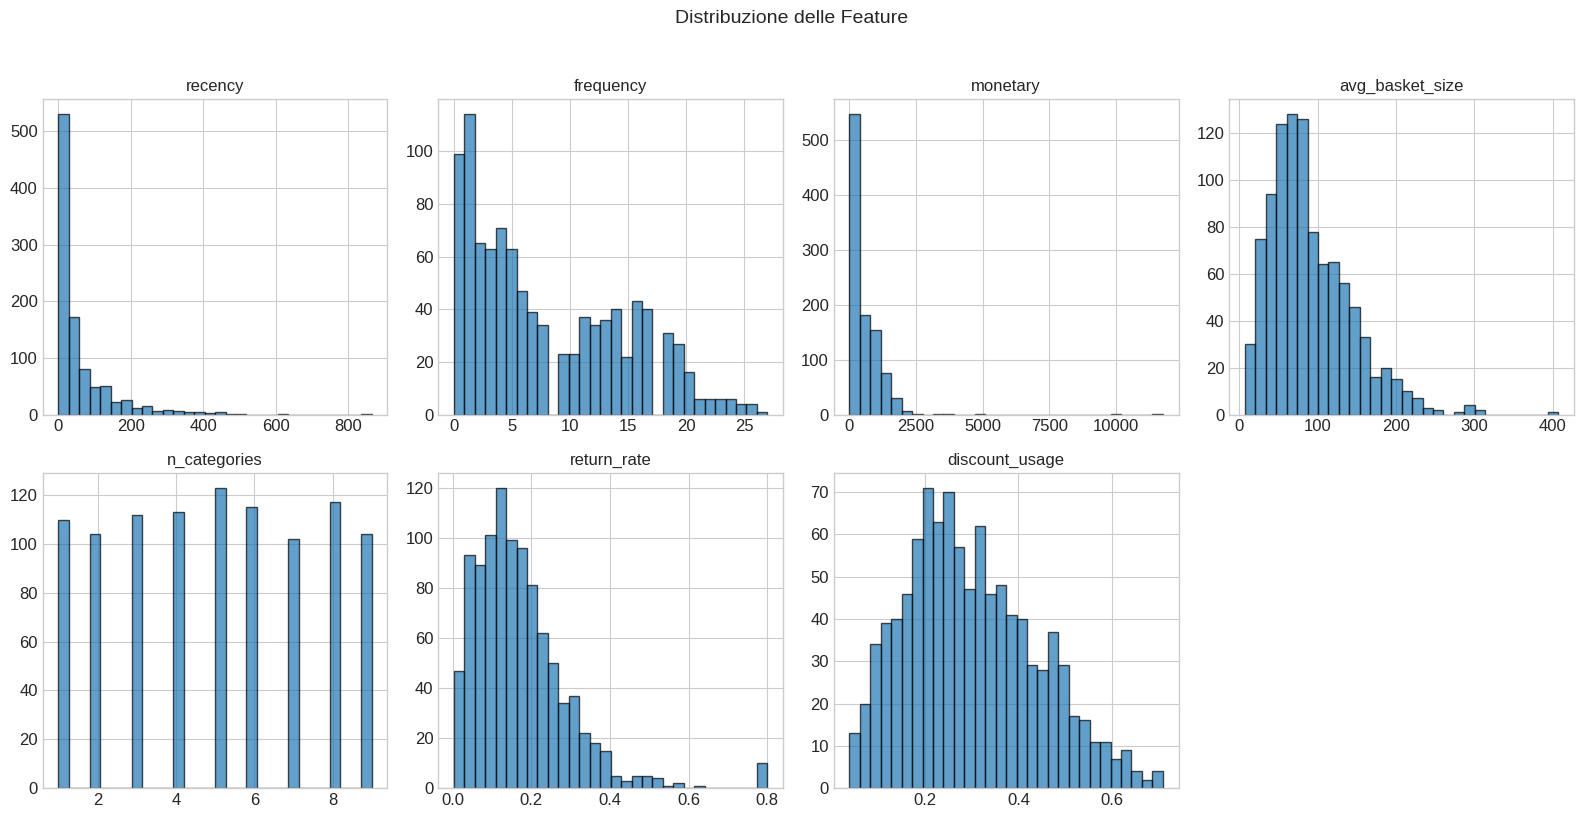

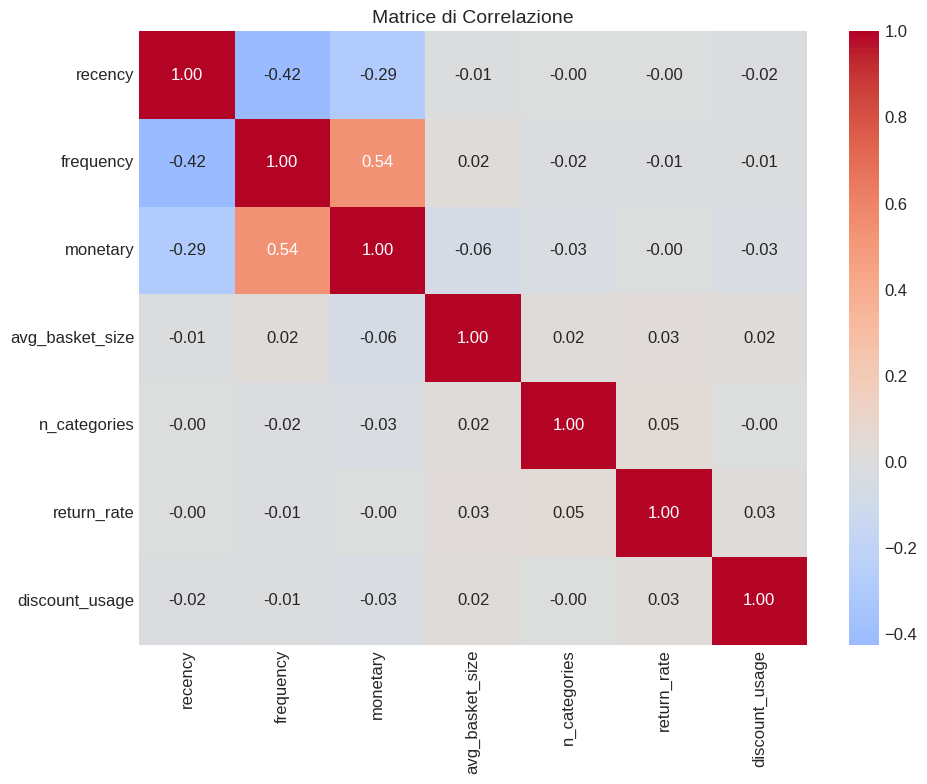

In [23]:
# Step 1: Preprocessing e analisi esplorativa

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

# Ricreo il dataset (incapsulamento)
np.random.seed(42)
n_customers = 1000

data = {
    'customer_id': range(1, n_customers + 1),
    'recency': np.concatenate([np.random.exponential(15, 400), np.random.exponential(60, 350), np.random.exponential(150, 250)]),
    'frequency': np.concatenate([np.random.poisson(15, 400), np.random.poisson(5, 350), np.random.poisson(1, 250)]),
    'monetary': np.concatenate([np.random.gamma(5, 200, 400), np.random.gamma(3, 100, 350), np.random.gamma(2, 50, 250)]),
    'avg_basket_size': np.random.gamma(3, 30, n_customers),
    'n_categories': np.random.randint(1, 10, n_customers),
    'return_rate': np.random.beta(2, 10, n_customers),
    'discount_usage': np.random.beta(3, 7, n_customers),
}

df_customers = pd.DataFrame(data)
outlier_indices = np.random.choice(n_customers, 20, replace=False)
df_customers.loc[outlier_indices[:10], 'monetary'] *= 10
df_customers.loc[outlier_indices[10:], 'return_rate'] = 0.8

# Selezioniamo le feature per il clustering
features = ['recency', 'frequency', 'monetary', 'avg_basket_size', 'n_categories', 'return_rate', 'discount_usage']
X_customers = df_customers[features].values

# Standardizzazione
scaler_proj = StandardScaler()
X_customers_scaled = scaler_proj.fit_transform(X_customers)

# Visualizzazione distribuzioni
fig, axes = plt.subplots(2, 4, figsize=(16, 8))
axes = axes.flatten()

for i, col in enumerate(features):
    axes[i].hist(df_customers[col], bins=30, edgecolor='black', alpha=0.7)
    axes[i].set_title(col, fontsize=12)
    axes[i].set_xlabel('')

axes[-1].axis('off')  # Nascondo l'ultimo subplot vuoto

plt.suptitle('Distribuzione delle Feature', fontsize=14, y=1.02)
plt.tight_layout()
plt.show()

# Matrice di correlazione
plt.figure(figsize=(10, 8))
correlation_matrix = df_customers[features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt='.2f')
plt.title('Matrice di Correlazione', fontsize=14)
plt.tight_layout()
plt.show()

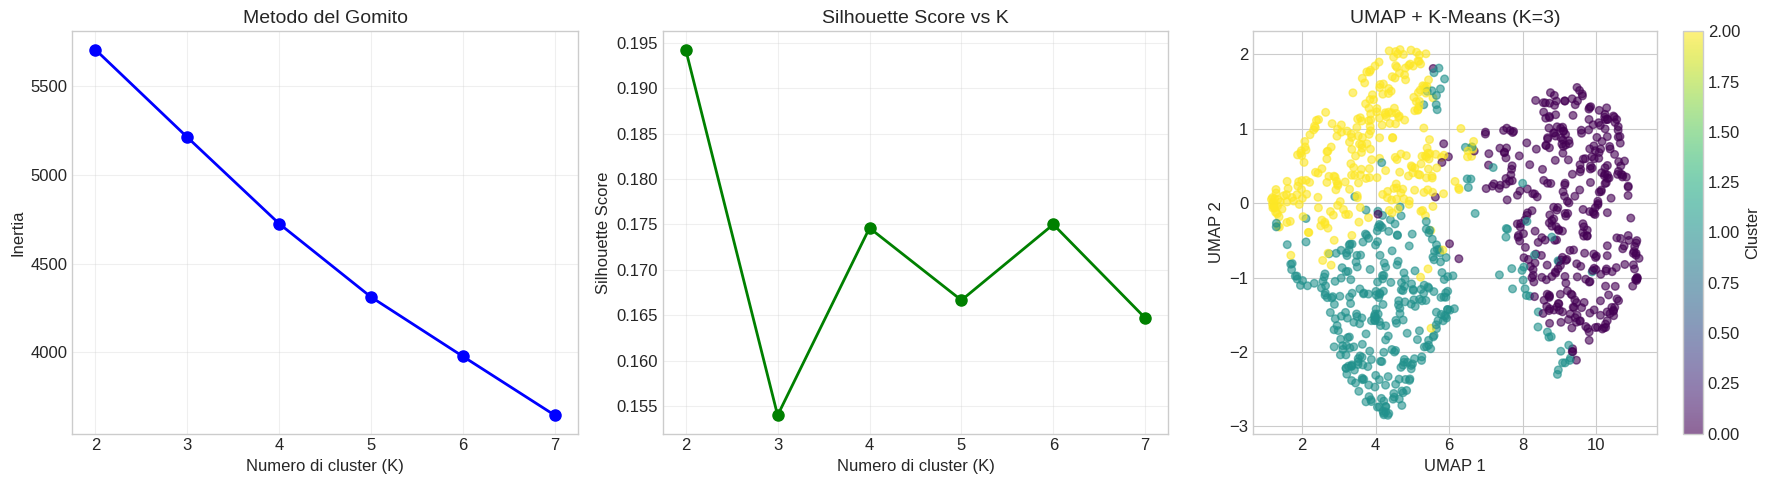

ANALISI SCELTA DI K
  K=2: Silhouette = 0.1942 <--
  K=3: Silhouette = 0.1540
  K=4: Silhouette = 0.1746
  K=5: Silhouette = 0.1666
  K=6: Silhouette = 0.1750
  K=7: Silhouette = 0.1647

K ottimale per Silhouette: 2
Silhouette K=3: 0.1540 (delta da K=2: -0.0403)

Scelta finale: K=3
Motivazione: la Silhouette preferisce K=2, ma la differenza con K=3 e modesta.
Nell'analisi RFM e-commerce, 3 segmenti (VIP, Occasionali, Dormienti)
rappresentano lo standard di settore. La scelta di K va sempre
bilanciata tra metriche quantitative e conoscenza del dominio.


In [24]:
# Step 2: Riduzione dimensionale + Clustering

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import umap
import warnings
warnings.filterwarnings('ignore')

# Ricreo il dataset (incapsulamento)
np.random.seed(42)
n_customers = 1000

data = {
    'customer_id': range(1, n_customers + 1),
    'recency': np.concatenate([
        np.random.exponential(15, 400),
        np.random.exponential(60, 350),
        np.random.exponential(150, 250)
    ]),
    'frequency': np.concatenate([
        np.random.poisson(15, 400),
        np.random.poisson(5, 350),
        np.random.poisson(1, 250)
    ]),
    'monetary': np.concatenate([
        np.random.gamma(5, 200, 400),
        np.random.gamma(3, 100, 350),
        np.random.gamma(2, 50, 250)
    ]),
    'avg_basket_size': (
        np.random.gamma(3, 30, n_customers)
    ),
    'n_categories': (
        np.random.randint(1, 10, n_customers)
    ),
    'return_rate': (
        np.random.beta(2, 10, n_customers)
    ),
    'discount_usage': (
        np.random.beta(3, 7, n_customers)
    ),
}

df_customers = pd.DataFrame(data)
outlier_indices = np.random.choice(
    n_customers, 20, replace=False
)
df_customers.loc[
    outlier_indices[:10], 'monetary'
] *= 10
df_customers.loc[
    outlier_indices[10:], 'return_rate'
] = 0.8

features = [
    'recency', 'frequency', 'monetary',
    'avg_basket_size', 'n_categories',
    'return_rate', 'discount_usage'
]
X_customers = df_customers[features].values
scaler_proj = StandardScaler()
X_customers_scaled = (
    scaler_proj.fit_transform(X_customers)
)

# PCA per varianza spiegata
pca_full = PCA()
pca_full.fit(X_customers_scaled)
print(f"Varianza spiegata (prime 3 PC): {pca_full.explained_variance_ratio_[:3].sum()*100:.1f}%")

# UMAP per visualizzazione
umap_model = umap.UMAP(
    n_components=2, n_neighbors=30,
    min_dist=0.1, random_state=42
)
X_umap = umap_model.fit_transform(X_customers_scaled)

# Trova K ottimale con Elbow + Silhouette
K_range = range(2, 8)
inertias = []
silhouettes = []

for k in K_range:
    kmeans = KMeans(
        n_clusters=k, random_state=42, n_init=10
    )
    labels = kmeans.fit_predict(X_customers_scaled)
    inertias.append(kmeans.inertia_)
    silhouettes.append(
        silhouette_score(X_customers_scaled, labels)
    )

# Visualizzazione
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Elbow plot
axes[0].plot(
    list(K_range), inertias,
    'bo-', linewidth=2, markersize=8
)
axes[0].set_xlabel('Numero di cluster (K)')
axes[0].set_ylabel('Inertia')
axes[0].set_title('Metodo del Gomito', fontsize=14)
axes[0].grid(True, alpha=0.3)

# Silhouette plot
axes[1].plot(
    list(K_range), silhouettes,
    'go-', linewidth=2, markersize=8
)
axes[1].set_xlabel('Numero di cluster (K)')
axes[1].set_ylabel('Silhouette Score')
axes[1].set_title('Silhouette Score vs K', fontsize=14)
axes[1].grid(True, alpha=0.3)

# UMAP con K=3 (scelta finale)
kmeans_final = KMeans(
    n_clusters=3, random_state=42, n_init=10
)
final_labels = kmeans_final.fit_predict(
    X_customers_scaled
)
scatter = axes[2].scatter(
    X_umap[:, 0], X_umap[:, 1],
    c=final_labels, cmap='viridis',
    alpha=0.6, s=30
)
axes[2].set_title(
    'UMAP + K-Means (K=3)', fontsize=14
)
axes[2].set_xlabel('UMAP 1')
axes[2].set_ylabel('UMAP 2')
plt.colorbar(scatter, ax=axes[2], label='Cluster')

plt.tight_layout()
plt.show()

# Report sulla scelta di K
k_best_sil = list(K_range)[
    np.argmax(silhouettes)
]
print("=" * 55)
print("ANALISI SCELTA DI K")
print("=" * 55)
for k, sil in zip(K_range, silhouettes):
    marker = " <--" if k == k_best_sil else ""
    print(f"  K={k}: Silhouette = {sil:.4f}{marker}")

print(
    f"\nK ottimale per Silhouette: {k_best_sil}"
)
print(
    f"Silhouette K=3: {silhouettes[1]:.4f} "
    f"(delta da K={k_best_sil}: "
    f"{silhouettes[1] - max(silhouettes):.4f})"
)
print(
    "\nScelta finale: K=3"
    "\nMotivazione: la Silhouette preferisce K=2, "
    "ma la differenza con K=3 e modesta."
    "\nNell'analisi RFM e-commerce, 3 segmenti "
    "(VIP, Occasionali, Dormienti)"
    "\nrappresentano lo standard di settore. "
    "La scelta di K va sempre"
    "\nbilanciata tra metriche quantitative "
    "e conoscenza del dominio."
)

In [25]:
# Step 3: Analisi dei segmenti + Anomaly Detection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import warnings
warnings.filterwarnings('ignore')

# Ricreo il dataset e il clustering (incapsulamento)
np.random.seed(42)
n_customers = 1000

data = {
    'customer_id': range(1, n_customers + 1),
    'recency': np.concatenate([np.random.exponential(15, 400), np.random.exponential(60, 350), np.random.exponential(150, 250)]),
    'frequency': np.concatenate([np.random.poisson(15, 400), np.random.poisson(5, 350), np.random.poisson(1, 250)]),
    'monetary': np.concatenate([np.random.gamma(5, 200, 400), np.random.gamma(3, 100, 350), np.random.gamma(2, 50, 250)]),
    'avg_basket_size': np.random.gamma(3, 30, n_customers),
    'n_categories': np.random.randint(1, 10, n_customers),
    'return_rate': np.random.beta(2, 10, n_customers),
    'discount_usage': np.random.beta(3, 7, n_customers),
}

df_customers = pd.DataFrame(data)
outlier_indices = np.random.choice(n_customers, 20, replace=False)
df_customers.loc[outlier_indices[:10], 'monetary'] *= 10
df_customers.loc[outlier_indices[10:], 'return_rate'] = 0.8

features = ['recency', 'frequency', 'monetary', 'avg_basket_size', 'n_categories', 'return_rate', 'discount_usage']
X_customers = df_customers[features].values
scaler_proj = StandardScaler()
X_customers_scaled = scaler_proj.fit_transform(X_customers)

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_customers_scaled)
df_customers['cluster'] = cluster_labels

# Profilo dei segmenti
print("=" * 60)
print("PROFILO DEI SEGMENTI CLIENTI")
print("=" * 60)

cluster_profiles = df_customers.groupby('cluster')[features].mean().round(2)
cluster_sizes = df_customers['cluster'].value_counts().sort_index()

for cluster_id in range(3):
    print(f"\nCLUSTER {cluster_id} - {cluster_sizes[cluster_id]} clienti ({100*cluster_sizes[cluster_id]/n_customers:.1f}%)")
    print("-" * 40)
    for feat in features:
        print(f"  {feat}: {cluster_profiles.loc[cluster_id, feat]}")

# Anomaly Detection con Isolation Forest
iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
anomaly_labels = iso_forest.fit_predict(X_customers_scaled)
df_customers['is_anomaly'] = anomaly_labels == -1

print("\n" + "=" * 60)
print("ANOMALY DETECTION")
print("=" * 60)
print(f"Clienti anomali identificati: {sum(df_customers['is_anomaly'])}")
print("\nClienti anomali per cluster:")
print(df_customers.groupby('cluster')['is_anomaly'].sum())

PROFILO DEI SEGMENTI CLIENTI

CLUSTER 0 - 372 clienti (37.2%)
----------------------------------------
  recency: 14.53
  frequency: 15.4
  monetary: 1098.58
  avg_basket_size: 91.1
  n_categories: 5.26
  return_rate: 0.17
  discount_usage: 0.3

CLUSTER 1 - 336 clienti (33.6%)
----------------------------------------
  recency: 56.66
  frequency: 4.26
  monetary: 275.96
  avg_basket_size: 87.1
  n_categories: 2.9
  return_rate: 0.15
  discount_usage: 0.3

CLUSTER 2 - 292 clienti (29.2%)
----------------------------------------
  recency: 126.15
  frequency: 2.86
  monetary: 198.43
  avg_basket_size: 92.09
  n_categories: 7.07
  return_rate: 0.2
  discount_usage: 0.3

ANOMALY DETECTION
Clienti anomali identificati: 20

Clienti anomali per cluster:
cluster
0    9
1    3
2    8
Name: is_anomaly, dtype: int64


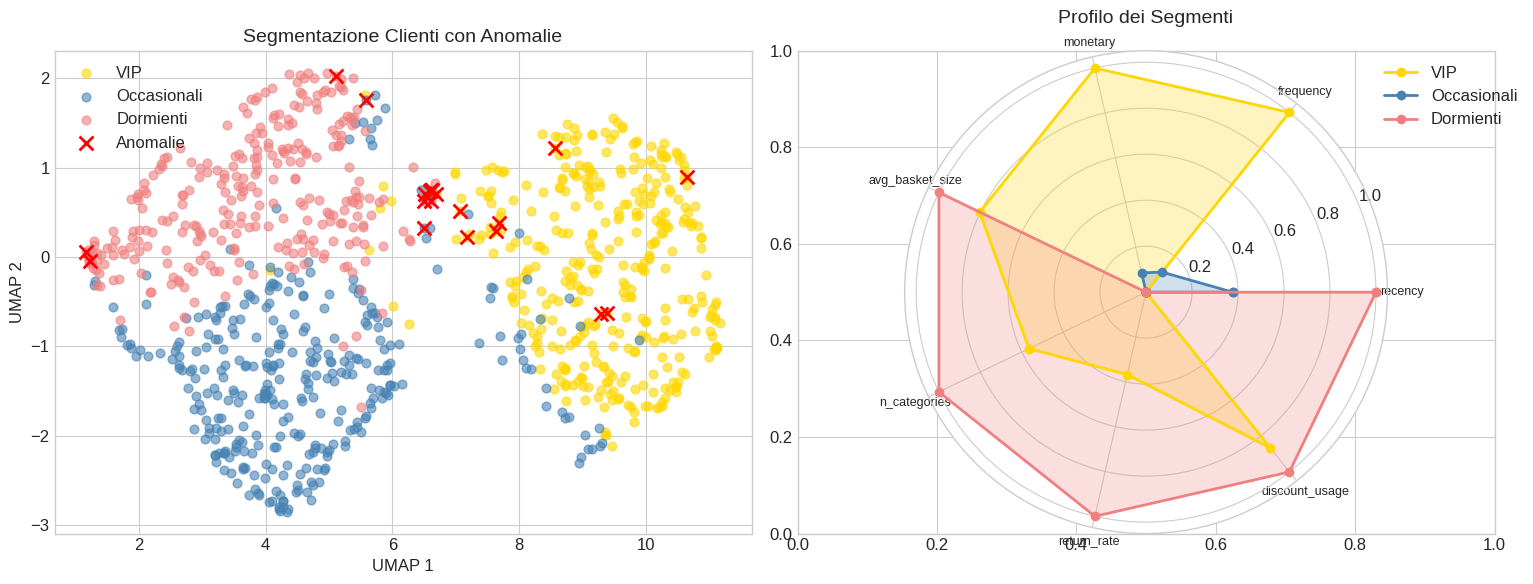


RIEPILOGO SEGMENTAZIONE

Segmento VIP: Alta frequenza, alto valore monetario, bassa recency
Segmento Occasionali: Frequenza media, valore medio
Segmento Dormienti: Bassa frequenza, alta recency, basso valore

Anomalie rilevate: 20 clienti da investigare


In [26]:
# Step 4: Visualizzazione finale e interpretazione

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import IsolationForest
import umap
import warnings
warnings.filterwarnings('ignore')

# Ricreo tutto (incapsulamento)
np.random.seed(42)
n_customers = 1000

data = {
    'customer_id': range(1, n_customers + 1),
    'recency': np.concatenate([np.random.exponential(15, 400), np.random.exponential(60, 350), np.random.exponential(150, 250)]),
    'frequency': np.concatenate([np.random.poisson(15, 400), np.random.poisson(5, 350), np.random.poisson(1, 250)]),
    'monetary': np.concatenate([np.random.gamma(5, 200, 400), np.random.gamma(3, 100, 350), np.random.gamma(2, 50, 250)]),
    'avg_basket_size': np.random.gamma(3, 30, n_customers),
    'n_categories': np.random.randint(1, 10, n_customers),
    'return_rate': np.random.beta(2, 10, n_customers),
    'discount_usage': np.random.beta(3, 7, n_customers),
}

df_customers = pd.DataFrame(data)
outlier_indices = np.random.choice(n_customers, 20, replace=False)
df_customers.loc[outlier_indices[:10], 'monetary'] *= 10
df_customers.loc[outlier_indices[10:], 'return_rate'] = 0.8

features = ['recency', 'frequency', 'monetary', 'avg_basket_size', 'n_categories', 'return_rate', 'discount_usage']
X_customers = df_customers[features].values
scaler_proj = StandardScaler()
X_customers_scaled = scaler_proj.fit_transform(X_customers)

umap_model = umap.UMAP(n_components=2, n_neighbors=30, min_dist=0.1, random_state=42)
X_umap = umap_model.fit_transform(X_customers_scaled)

kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_customers_scaled)

iso_forest = IsolationForest(n_estimators=100, contamination=0.02, random_state=42)
anomaly_labels = iso_forest.fit_predict(X_customers_scaled)
anomaly_mask = anomaly_labels == -1

# Visualizzazione finale
fig = plt.figure(figsize=(16, 6))
ax_scatter = fig.add_subplot(121)

# Cluster con nomi interpretativi
cluster_names = {0: 'VIP', 1: 'Occasionali', 2: 'Dormienti'}
colors = ['gold', 'steelblue', 'lightcoral']

for i in range(3):
    mask = cluster_labels == i
    ax_scatter.scatter(X_umap[mask, 0], X_umap[mask, 1],
                    c=colors[i], label=cluster_names[i], alpha=0.6, s=40)

ax_scatter.scatter(X_umap[anomaly_mask, 0], X_umap[anomaly_mask, 1],
                c='red', marker='x', s=100, linewidths=2, label='Anomalie')

ax_scatter.set_xlabel('UMAP 1')
ax_scatter.set_ylabel('UMAP 2')
ax_scatter.set_title('Segmentazione Clienti con Anomalie', fontsize=14)
ax_scatter.legend()

# Radar chart dei profili
from math import pi

# Calcolo profili normalizzati
df_customers['cluster'] = cluster_labels
profiles = df_customers.groupby('cluster')[features].mean()
profiles_norm = (profiles - profiles.min()) / (profiles.max() - profiles.min())

# Setup radar
categories = features
N = len(categories)
angles = [n / float(N) * 2 * pi for n in range(N)]
angles += angles[:1]

ax_radar = fig.add_subplot(122, polar=True)

for i in range(3):
    values = profiles_norm.loc[i].values.tolist()
    values += values[:1]
    ax_radar.plot(angles, values, 'o-', linewidth=2, label=cluster_names[i], color=colors[i])
    ax_radar.fill(angles, values, alpha=0.25, color=colors[i])

ax_radar.set_xticks(angles[:-1])
ax_radar.set_xticklabels(categories, size=9)
ax_radar.set_title('Profilo dei Segmenti', fontsize=14, pad=20)
ax_radar.legend(loc='upper right', bbox_to_anchor=(1.3, 1.0))

plt.tight_layout()
plt.show()

# Riepilogo finale
print("\n" + "=" * 60)
print("RIEPILOGO SEGMENTAZIONE")
print("=" * 60)
print("\nSegmento VIP: Alta frequenza, alto valore monetario, bassa recency")
print("Segmento Occasionali: Frequenza media, valore medio")
print("Segmento Dormienti: Bassa frequenza, alta recency, basso valore")
print(f"\nAnomalie rilevate: {sum(anomaly_mask)} clienti da investigare")

---

## 7. Conclusioni e Risorse

### 7.1 Sintesi dei concetti

In questo corso abbiamo esplorato le quattro categorie principali dell'Unsupervised Learning:

| Categoria | Tecniche | Applicazioni |
|-----------|----------|-------------|
| **Clustering** | K-Means, DBSCAN, Hierarchical, GMM | Segmentazione, raggruppamento |
| **Dim. Reduction** | PCA, t-SNE, UMAP | Visualizzazione, preprocessing |
| **Anomaly Detection** | Isolation Forest, LOF | Frodi, manutenzione |
| **Association Rules** | Apriori, FP-Growth | Market basket analysis |

### 7.2 Prossimi passi

Per approfondire l'Unsupervised Learning:

1. **Tecniche avanzate di clustering**: HDBSCAN, Spectral Clustering
2. **Self-Supervised Learning**: contrastive learning, autoencoders
3. **Topic Modeling**: LDA, NMF per testo
4. **Graph-based methods**: community detection, node embedding

### 7.3 Risorse per approfondire

**Libri**
- "Pattern Recognition and Machine Learning" - Christopher Bishop
- "Hands-On Machine Learning" - Aurelien Geron
- "Python Machine Learning" - Sebastian Raschka

**Documentazione**
- [Scikit-learn Unsupervised Learning](https://scikit-learn.org/stable/unsupervised_learning.html)
- [UMAP Documentation](https://umap-learn.readthedocs.io/)
- [mlxtend Documentation](https://rasbt.github.io/mlxtend/)

**Corsi online**
- DataCamp: Unsupervised Learning in Python
- Coursera: Machine Learning Specialization
- Fast.ai: Practical Deep Learning

### 7.4 Progetti suggeriti

1. **Image Clustering**: clusterizza immagini CIFAR-10 con feature estratte da CNN
2. **Customer Churn Analysis**: combina clustering con survival analysis
3. **Document Clustering**: analizza articoli di news con TF-IDF + clustering
4. **Network Intrusion Detection**: applica anomaly detection a dati di rete
5. **Recommendation System**: usa association rules per suggerimenti prodotti

---

## Fine del Corso

Complimenti per aver completato il corso di Unsupervised Learning!

Hai imparato a:
- Applicare algoritmi di clustering per segmentare dati
- Ridurre la dimensionalita per visualizzazione e preprocessing
- Rilevare anomalie in dataset complessi
- Scoprire regole di associazione tra variabili

**Ricorda**: la scelta dell'algoritmo dipende sempre dal problema, dai dati e dagli obiettivi. Non esiste un approccio universale: sperimenta e confronta!